# Data Visualisation & Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget https://www.dropbox.com/s/jpw4fyv6mh31ql4/NTP2015-2017fire.txt

--2021-12-27 07:55:32--  https://www.dropbox.com/s/jpw4fyv6mh31ql4/NTP2015-2017fire.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/jpw4fyv6mh31ql4/NTP2015-2017fire.txt [following]
--2021-12-27 07:55:32--  https://www.dropbox.com/s/raw/jpw4fyv6mh31ql4/NTP2015-2017fire.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc0af806d03ead828688bded623.dl.dropboxusercontent.com/cd/0/inline/BcoBjfm-kCzW84iJxrsfsDOWRHQH6kz4D0jaMPba_fb2TggJNUctTp1OpdMsLtoqd6wNMn0CC7GRNQAeUfUK7N61iw4ba3PvUs6gme_sufGSCIToDot-vGUgudubIOdYAE_I_fWqNQXytN929fkN4SlJ/file# [following]
--2021-12-27 07:55:33--  https://ucc0af806d03ead828688bded623.dl.dropboxusercontent.com/cd/0/inline/BcoBjfm-kCzW84iJxrsfsDOWRHQH6kz4D0jaMPba_fb2TggJNUctTp1OpdMsLto

In [3]:
%cd /content/
#df = pd.read_csv('/content/gdrive/MyDrive/dlku/NTP2015fire-Jan.txt', sep='\t', header=None)
df = pd.read_csv('NTP2015-2017fire.txt', sep='\t', header=None)
df.columns = ["date", "station", "addr1", "addr2", "longitude", "latitude", "township"]

/content


In [4]:
df

,date,station,addr1,addr2,longitude,latitude,township
0,2015/1/1 0:13,火警-瓦斯漏氣,新北市板橋區重慶路245巷 擎天雙星,新北市板橋區重慶路245巷100號,121.466281,25.000569,板橋區廣德里
1,2015/1/1 0:16,火警-倉庫,新北市三重區富福街48號;5樓,新北市三重區富福街45號,121.491579,25.084172,三重區富華里
2,2015/1/1 0:48,火警-查看案件,新北市淡水區民權路139號;11樓,新北市淡水區民權路139號,121.460224,25.136422,淡水區民權里
3,2015/1/1 0:56,火警-查看案件,新北市新莊區 新月橋近新莊端,新北市新莊區,121.450333,25.031506,新莊區泰豐里
4,2015/1/1 1:04,火警-汽車,新北市樹林區八德街71巷,新北市樹林區八德街71巷10號,121.420005,24.982273,樹林區和平里
...,...,...,...,...,...,...,...
24085,2017/12/31 17:14,火警-集合住宅,新北市中和區圓通路305巷3弄7號 對面5樓,新北市中和區圓通路305巷5弄7號,121.493909,24.990417,中和區錦盛里
24086,2017/12/31 18:40,火警-集合住宅,新北市汐止區橫科路322巷24弄6號1樓,新北市汐止區橫科路322巷24弄6號之1,121.621682,25.048063,汐止區東勢里
24087,2017/12/31 20:09,火警-查看案件,新北市三重區溪尾街30號,新北市三重區溪尾街30號,121.490806,25.076529,三重區福隆里
24088,2017/12/31 20:44,火警-查看案件,新北市永和區民族街67巷27弄5號,新北市永和區民族街67巷27弄5號,121.519391,24.997367,永和區民族里


In [5]:
#set date time format
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d %H:%M:%S')

In [6]:
df

,date,station,addr1,addr2,longitude,latitude,township
0,2015-01-01 00:13:00,火警-瓦斯漏氣,新北市板橋區重慶路245巷 擎天雙星,新北市板橋區重慶路245巷100號,121.466281,25.000569,板橋區廣德里
1,2015-01-01 00:16:00,火警-倉庫,新北市三重區富福街48號;5樓,新北市三重區富福街45號,121.491579,25.084172,三重區富華里
2,2015-01-01 00:48:00,火警-查看案件,新北市淡水區民權路139號;11樓,新北市淡水區民權路139號,121.460224,25.136422,淡水區民權里
3,2015-01-01 00:56:00,火警-查看案件,新北市新莊區 新月橋近新莊端,新北市新莊區,121.450333,25.031506,新莊區泰豐里
4,2015-01-01 01:04:00,火警-汽車,新北市樹林區八德街71巷,新北市樹林區八德街71巷10號,121.420005,24.982273,樹林區和平里
...,...,...,...,...,...,...,...
24085,2017-12-31 17:14:00,火警-集合住宅,新北市中和區圓通路305巷3弄7號 對面5樓,新北市中和區圓通路305巷5弄7號,121.493909,24.990417,中和區錦盛里
24086,2017-12-31 18:40:00,火警-集合住宅,新北市汐止區橫科路322巷24弄6號1樓,新北市汐止區橫科路322巷24弄6號之1,121.621682,25.048063,汐止區東勢里
24087,2017-12-31 20:09:00,火警-查看案件,新北市三重區溪尾街30號,新北市三重區溪尾街30號,121.490806,25.076529,三重區福隆里
24088,2017-12-31 20:44:00,火警-查看案件,新北市永和區民族街67巷27弄5號,新北市永和區民族街67巷27弄5號,121.519391,24.997367,永和區民族里


In [7]:
#extract only numerical/quantitative data
dften = df[["date", "longitude", "latitude"]]

In [8]:
dften

,date,longitude,latitude
0,2015-01-01 00:13:00,121.466281,25.000569
1,2015-01-01 00:16:00,121.491579,25.084172
2,2015-01-01 00:48:00,121.460224,25.136422
3,2015-01-01 00:56:00,121.450333,25.031506
4,2015-01-01 01:04:00,121.420005,24.982273
...,...,...,...
24085,2017-12-31 17:14:00,121.493909,24.990417
24086,2017-12-31 18:40:00,121.621682,25.048063
24087,2017-12-31 20:09:00,121.490806,25.076529
24088,2017-12-31 20:44:00,121.519391,24.997367


In [9]:
BBox = ((dften.longitude.min(),   dften.longitude.max(),      
         dften.latitude.min(), dften.latitude.max()))

In [10]:
#Print out the coordinates, and go to Openstreetmap website to draw a map.
BBox

(121.2868855, 122.0030709, 24.77511693, 25.29717505)

(24.77511693, 25.29717505)

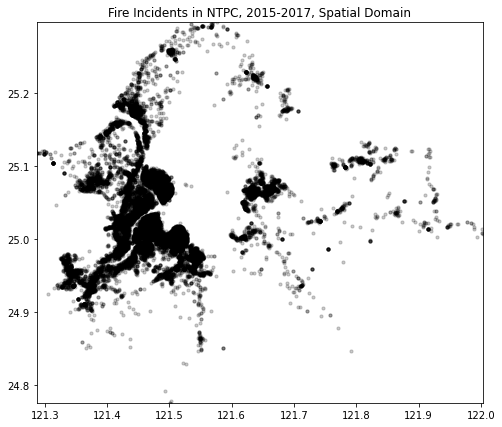

In [11]:
#let's plot the points
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(dften.longitude, dften.latitude, zorder=1, alpha= 0.2, c='k', s=10)
ax.set_title('Fire Incidents in NTPC, 2015-2017, Spatial Domain')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

In [12]:
#split dataframe into 3 years
df15 = df[df['date'].dt.year == 2015]
df16 = df[df['date'].dt.year == 2016]
df17 = df[df['date'].dt.year == 2017]

In [13]:
df15

,date,station,addr1,addr2,longitude,latitude,township
0,2015-01-01 00:13:00,火警-瓦斯漏氣,新北市板橋區重慶路245巷 擎天雙星,新北市板橋區重慶路245巷100號,121.466281,25.000569,板橋區廣德里
1,2015-01-01 00:16:00,火警-倉庫,新北市三重區富福街48號;5樓,新北市三重區富福街45號,121.491579,25.084172,三重區富華里
2,2015-01-01 00:48:00,火警-查看案件,新北市淡水區民權路139號;11樓,新北市淡水區民權路139號,121.460224,25.136422,淡水區民權里
3,2015-01-01 00:56:00,火警-查看案件,新北市新莊區 新月橋近新莊端,新北市新莊區,121.450333,25.031506,新莊區泰豐里
4,2015-01-01 01:04:00,火警-汽車,新北市樹林區八德街71巷,新北市樹林區八德街71巷10號,121.420005,24.982273,樹林區和平里
...,...,...,...,...,...,...,...
9054,2015-12-31 21:41:00,火警-透天厝,新北市中和區大勇街25巷後面,新北市中和區大勇街29巷23弄2號,121.515367,24.994490,中和區秀明里
9055,2015-12-31 21:46:00,火警-集合住宅,新北市樹林區三福街29號;3樓,新北市樹林區三福街29號,121.408602,25.016660,樹林區三福里
9056,2015-12-31 22:37:00,火警-查看案件,新北市林口區麗園一街 派出所後 公園,新北市林口區麗園一街11巷11號,121.378654,25.070749,林口區東勢里
9057,2015-12-31 22:45:00,火警-查看案件,新北市蘆洲區中正路508巷 抽水站後,新北市蘆洲區中正路516巷10號,121.462377,25.097674,蘆洲區保新里


In [14]:
df16

,date,station,addr1,addr2,longitude,latitude,township
9059,2016-01-01 01:10:00,火警-查看案件,新北市泰山區明志路二段298巷18號之3,新北市泰山區明志路二段254巷10號,121.426283,25.047863,泰山區明志里
9060,2016-01-01 01:18:00,火警-查看案件,新北市淡水區 油車口 公園 黑店,新北市淡水區中正東路二段88巷41弄18號,121.458573,25.145268,淡水區八勢里
9061,2016-01-01 01:27:00,火警-查看案件,新北市永和區中正橋 河濱公園 白線015電塔,新北市永和區保福路二段129號,121.509767,25.013844,永和區下溪里
9062,2016-01-01 03:30:00,火警-查看案件,新北市蘆洲區三民路605號3樓,新北市蘆洲區三民路605號,121.460724,25.093751,蘆洲區南港里
9063,2016-01-01 03:47:00,火警-汽車,新北市樹林區 樹仁家商,新北市樹林區大安路216號,121.419350,24.994834,樹林區潭底里
...,...,...,...,...,...,...,...
17156,2016-12-31 19:50:00,火警-集合住宅,新北市板橋區長江路二段207號;14樓,新北市板橋區長江路二段207號,121.467488,25.032542,板橋區溪頭里
17157,2016-12-31 21:51:00,火警-查看案件,新北市板橋區 溪崑國中,新北市板橋區大觀路三段50巷30號,121.431403,24.997751,板橋區崑崙里
17158,2016-12-31 22:30:00,火警-集合住宅,新北市板橋區漢生東路23巷56弄7號;2樓 後棟,新北市板橋區漢生東路23巷56弄7號,121.466328,25.018254,板橋區新民里
17159,2016-12-31 22:52:00,火警-查看案件,新北市林口區東湖 東湖公園,新北市林口區興林一街109巷10號,121.392091,25.072460,林口區西林里


In [15]:
df17

,date,station,addr1,addr2,longitude,latitude,township
17161,2017-01-01 00:13:00,火警-山林田野(平地),新北市鶯歌區 三鶯藝術文化中,新北市鶯歌區環河路175號之8,121.346366,24.936866,鶯歌區二甲里
17162,2017-01-01 00:15:00,火警-集合住宅,新北市三峽區大同路 介壽國小,新北市三峽區永安街7號,121.377841,24.929874,三峽區介壽里
17163,2017-01-01 00:54:00,火警-集合住宅,新北市板橋區館前西路130號;2樓,新北市板橋區館前西路130號,121.456567,25.007928,板橋區流芳里
17164,2017-01-01 01:44:00,火警-集合住宅,新北市汐止區新台五路一段160號,新北市汐止區連興街121號,121.653837,25.062100,汐止區文化里
17165,2017-01-01 01:59:00,火警-警報器作響,新北市汐止區鄉長路一段55巷6號,新北市汐止區鄉長路一段55巷6號,121.665361,25.076035,汐止區建成里
...,...,...,...,...,...,...,...
24085,2017-12-31 17:14:00,火警-集合住宅,新北市中和區圓通路305巷3弄7號 對面5樓,新北市中和區圓通路305巷5弄7號,121.493909,24.990417,中和區錦盛里
24086,2017-12-31 18:40:00,火警-集合住宅,新北市汐止區橫科路322巷24弄6號1樓,新北市汐止區橫科路322巷24弄6號之1,121.621682,25.048063,汐止區東勢里
24087,2017-12-31 20:09:00,火警-查看案件,新北市三重區溪尾街30號,新北市三重區溪尾街30號,121.490806,25.076529,三重區福隆里
24088,2017-12-31 20:44:00,火警-查看案件,新北市永和區民族街67巷27弄5號,新北市永和區民族街67巷27弄5號,121.519391,24.997367,永和區民族里


In [16]:
#extract only numerical/quantitative data
dfn15 = df15[["date", "longitude", "latitude"]]
dfn16 = df16[["date", "longitude", "latitude"]]
dfn17 = df17[["date", "longitude", "latitude"]]

(24.77511693, 25.29717505)

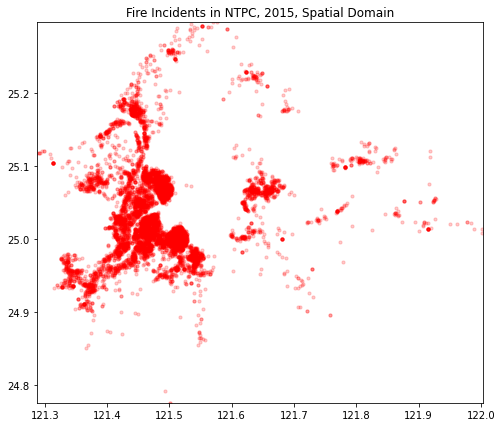

In [17]:
#let's plot the points for 2015
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df15.longitude, df15.latitude, zorder=1, alpha= 0.2, c='r', s=10)
ax.set_title('Fire Incidents in NTPC, 2015, Spatial Domain')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

(24.77511693, 25.29717505)

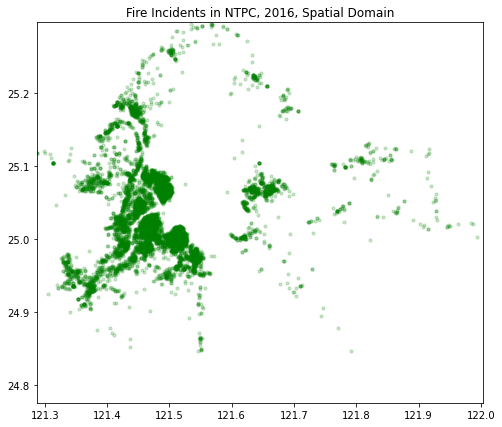

In [18]:
#let's plot the points for 2016
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df16.longitude, df16.latitude, zorder=1, alpha= 0.2, c='g', s=10)
ax.set_title('Fire Incidents in NTPC, 2016, Spatial Domain')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

(24.77511693, 25.29717505)

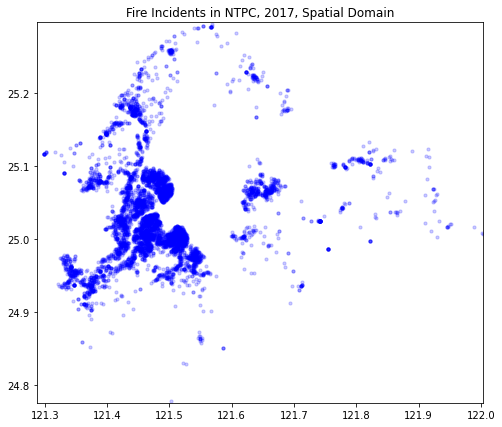

In [19]:
#let's plot the points for 2017
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df17.longitude, df17.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Fire Incidents in NTPC, 2017, Spatial Domain')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

In [20]:
#Extraction of the temporal domain
maxlimit = len(df)
ones = np.ones(maxlimit, dtype="uint32")
dftemp = pd.DataFrame(df.date)
dftemp['freq'] = ones

In [21]:
dftemp

,date,freq
0,2015-01-01 00:13:00,1
1,2015-01-01 00:16:00,1
2,2015-01-01 00:48:00,1
3,2015-01-01 00:56:00,1
4,2015-01-01 01:04:00,1
...,...,...
24085,2017-12-31 17:14:00,1
24086,2017-12-31 18:40:00,1
24087,2017-12-31 20:09:00,1
24088,2017-12-31 20:44:00,1


In [22]:
#when running this block, we will obtain the monthly frequency to be used in the temporal domain (a.k.a. time series).
dftempday = dftemp.groupby(pd.Grouper(key="date", freq="1D")).count()
dftempweek = dftemp.groupby(pd.Grouper(key="date", freq="1W")).count()
dftempmonth = dftemp.groupby(pd.Grouper(key="date", freq="1M")).count()

In [23]:
dftempday

,freq
date,
2015-01-01,34
2015-01-02,25
2015-01-03,24
2015-01-04,34
2015-01-05,28
...,...
2017-12-27,13
2017-12-28,19
2017-12-29,19


In [24]:
dftempweek

,freq
date,
2015-01-04,117
2015-01-11,163
2015-01-18,141
2015-01-25,210
2015-02-01,174
...,...
2017-12-03,125
2017-12-10,109
2017-12-17,105


In [25]:
dftempmonth

,freq
date,
2015-01-31,778
2015-02-28,776
2015-03-31,733
2015-04-30,844
2015-05-31,681
2015-06-30,677
2015-07-31,718
2015-08-31,1030
2015-09-30,792


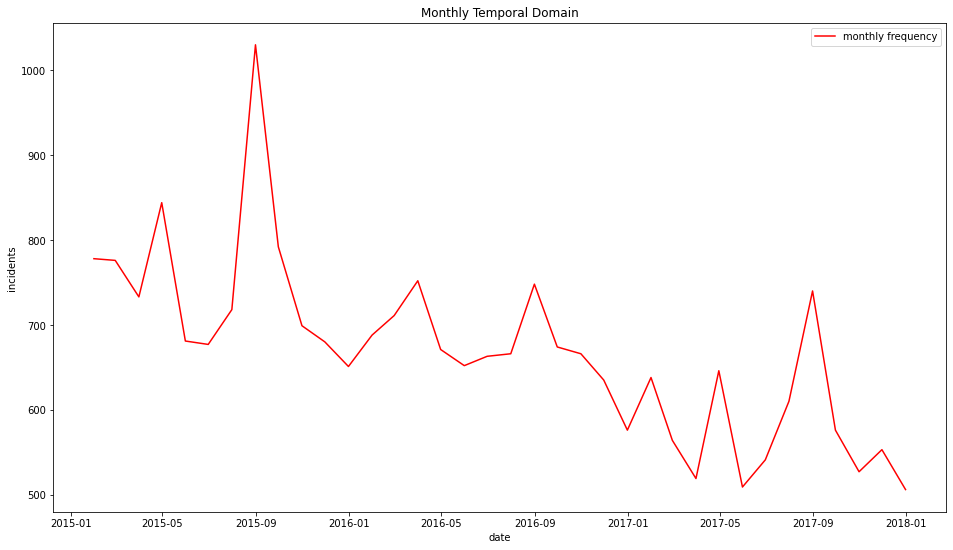

In [26]:
y = dftempmonth['freq']
x = dftempmonth.index
plt.rcParams["figure.figsize"] = (16,9)
plt.plot(x, y, color='r', label='monthly frequency') 
plt.xlabel('date')
plt.ylabel('incidents')
plt.title('Monthly Temporal Domain')
plt.legend() 
plt.show()


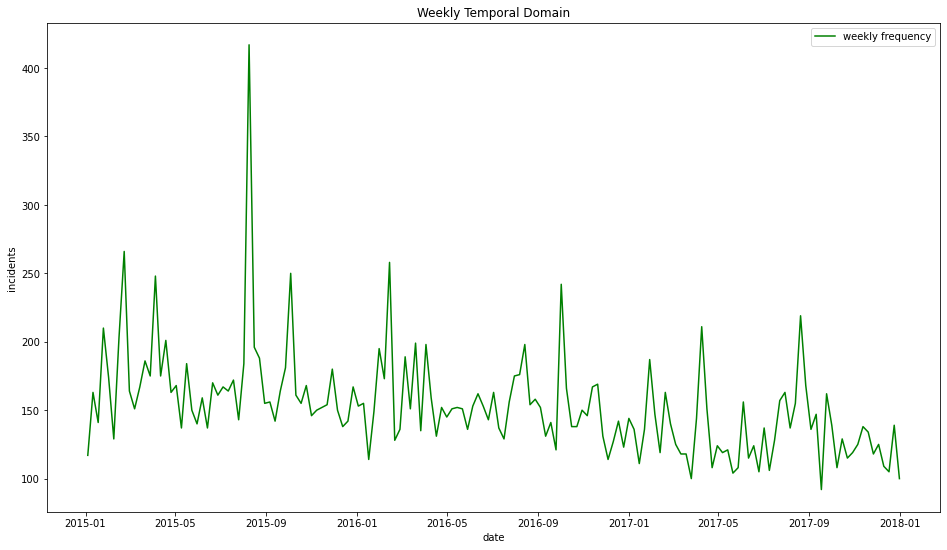

In [27]:
y = dftempweek['freq']
x = dftempweek.index
plt.rcParams["figure.figsize"] = (16,9)
plt.plot(x, y, color='g', label='weekly frequency')
plt.xlabel('date')
plt.ylabel('incidents')
plt.title('Weekly Temporal Domain')
plt.legend() 
plt.show()

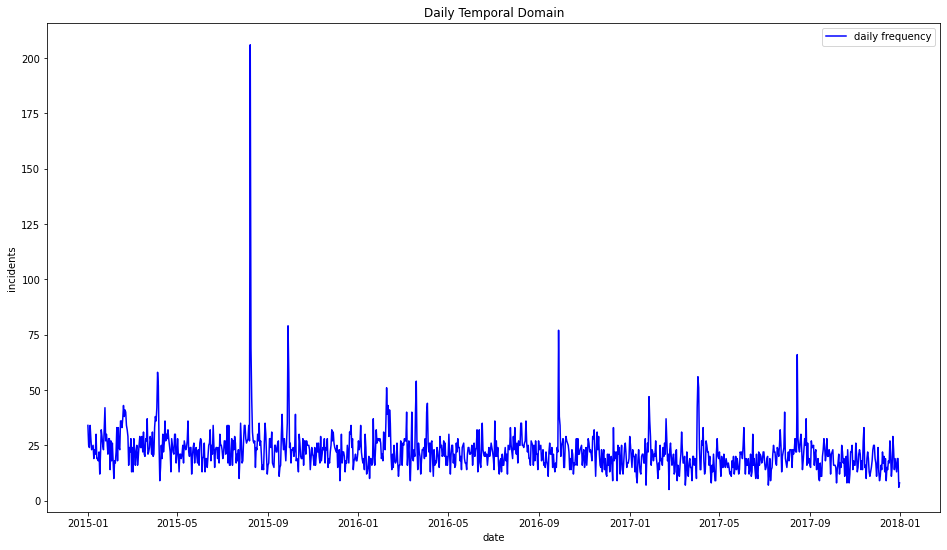

In [28]:
y = dftempday['freq']
x = dftempday.index
plt.rcParams["figure.figsize"] = (16,9)
plt.plot(x, y, color='b', label='daily frequency') 
plt.xlabel('date')
plt.ylabel('incidents')
plt.title('Daily Temporal Domain')
plt.legend() 
plt.show()

In [29]:
BBox

(121.2868855, 122.0030709, 24.77511693, 25.29717505)

Generate heatmap cells and convert hotspots to raster data using the "cytogenesis" function

In [30]:
def cytogenesis(df, nc, mapedges):
  #def calculate_cellsize(nc, mapedges):
  def calculate_cellsize():
    global lonmin
    global lonmax
    global latmin
    global latmax
    lonmin = mapedges[0]
    lonmax = mapedges[1]
    latmin = mapedges[2]
    latmax = mapedges[3]
    global csize_lon
    global csize_lat
    csize_lon = (lonmax - lonmin)/nc
    csize_lat = (latmax - latmin)/nc
    #print(csize_lon)
    #print(csize_lat)
    return csize_lon, csize_lat, lonmin, lonmax, latmin, latmax

  #call the 1st subfunction
  #csize_lon, csize_lat = calculate_cellsize(nc, mapedges)
  csize_lon, csize_lat, lonmin, lonmax, latmin, latmax = calculate_cellsize()
  
  #def draw_lines(nc,csize_lon,csize_lat):
  def draw_lines():
    global pixgrade_lon_left
    global pixgrade_lon_right
    global pixgrade_lat_bottom
    global pixgrade_lat_top

    pixgrade_lon_left = np.zeros(nc, dtype="float64")
    pixgrade_lon_right = np.zeros(nc, dtype="float64")
    pixgrade_lat_bottom = np.zeros(nc, dtype="float64")
    pixgrade_lat_top = np.zeros(nc, dtype="float64")
    #draw block boundaries
    for i in range (0,nc,1):

      pixgrade_lon_left[i] = lonmin + ((i)*(csize_lon))
      pixgrade_lon_right[i] = lonmin + ((i+1)*(csize_lon))
      pixgrade_lat_bottom[i] = latmin + ((i)*(csize_lat))
      pixgrade_lat_top[i] = latmin + ((i+1)*(csize_lat))
    
    #print(pixgrade_lon_left)
    #print(pixgrade_lon_right)
    #print(pixgrade_lat_bottom)
    #print(pixgrade_lat_top)
    return pixgrade_lon_left, pixgrade_lon_right, pixgrade_lat_bottom, pixgrade_lat_top

  #pixgrade_lon_left, pixgrade_lon_right, pixgrade_lat_bottom, pixgrade_lat_top = draw_lines(nc,csize_lon,csize_lat)
  pixgrade_lon_left, pixgrade_lon_right, pixgrade_lat_bottom, pixgrade_lat_top = draw_lines()

  #def cell_loader(df, nc, csize_lon, csize_lat, pixgrade_lon_left, pixgrade_lon_right, pixgrade_lat_bottom, pixgrade_lat_top):
  def cell_loader():  
    #create a board
    block = np.zeros((nc, nc), dtype="float32")
    point = np.zeros([len(df),2])

    for i in range (0,len(df),1):
      point[i,0] = df.longitude[i]
      point[i,1] = df.latitude[i]
      #the inner nested loop considers where to place each point into a cell
      for j in range (0,nc,1):
        for k in range (0,nc,1):
          if ((point[i,0] >= pixgrade_lon_left[j]) & (point[i,0] < pixgrade_lon_right[j]) & (point[i,1] >= pixgrade_lat_bottom[k]) & (point[i,1] < pixgrade_lat_top[k])):
            block[j,k] += 1
    #orgaise the cell tablet for proper visualisation
    global bq
    bq = np.rot90(block, k=1)
    bq = bq.astype(np.uint8)

    def heatmap2d(arr: np.ndarray):
      plt.imshow(arr, cmap='viridis')
      plt.colorbar()
      plt.show()

    heatmap2d(bq)
    return bq

  bq = cell_loader()
  return bq

#cytogenesis(dften, 28, BBox)

                 date   longitude   latitude
0 2015-01-01 00:13:00  121.466281  25.000569
1 2015-01-01 00:16:00  121.491579  25.084172
2 2015-01-01 00:48:00  121.460224  25.136422
3 2015-01-01 00:56:00  121.450333  25.031506
4 2015-01-01 01:04:00  121.420005  24.982273
                 date   longitude   latitude
0 2015-02-01 03:47:00  121.466255  25.031052
1 2015-02-01 06:00:00  121.537670  24.961963
2 2015-02-01 06:34:00  121.492942  25.055203
3 2015-02-01 07:02:00  121.471249  25.058024
4 2015-02-01 08:07:00  121.455368  25.015815
                 date   longitude   latitude
0 2015-03-01 01:23:00  121.471903  25.088160
1 2015-03-01 08:14:00  121.483050  25.062526
2 2015-03-01 08:42:00  121.382512  25.074408
3 2015-03-01 10:42:00  121.488696  25.049845
4 2015-03-01 12:02:00  121.412377  25.002980
                 date   longitude   latitude
0 2015-04-01 01:12:00  121.767935  25.100253
1 2015-04-01 04:02:00  121.486818  25.072468
2 2015-04-01 04:54:00  121.461981  25.138359
3 2015-04-

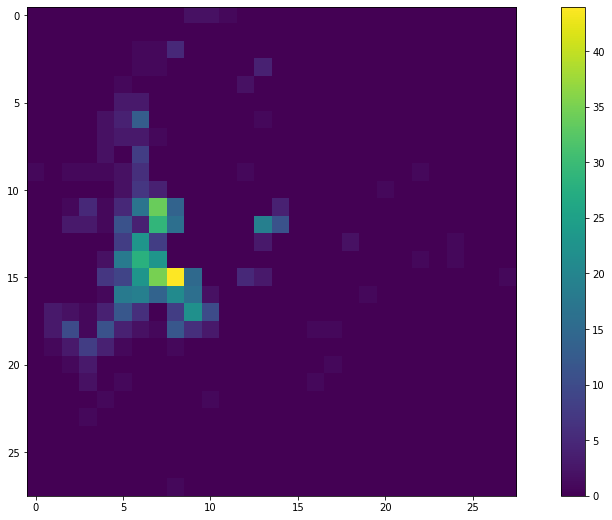

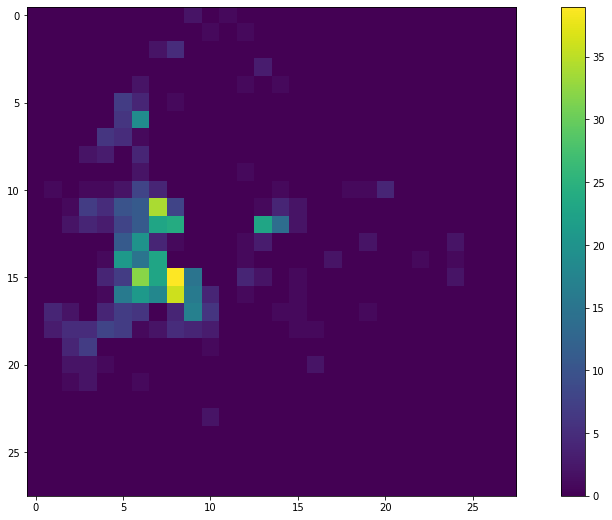

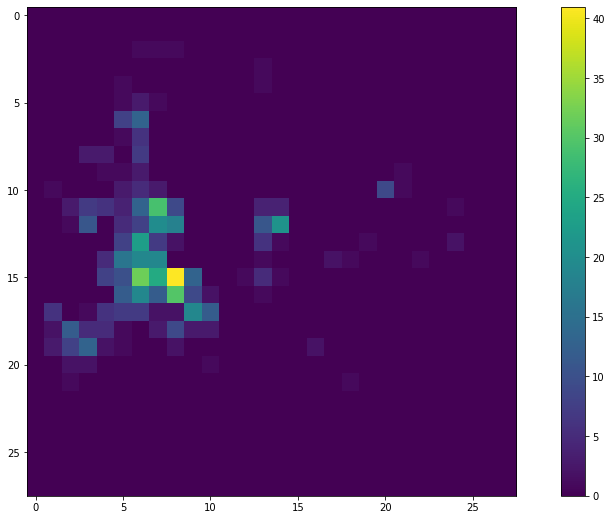

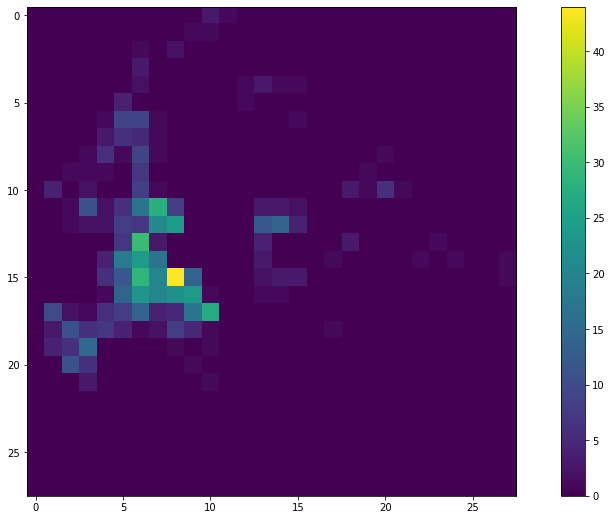

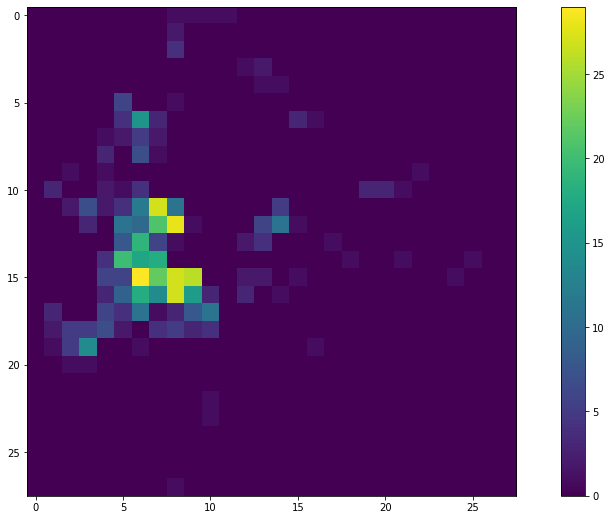

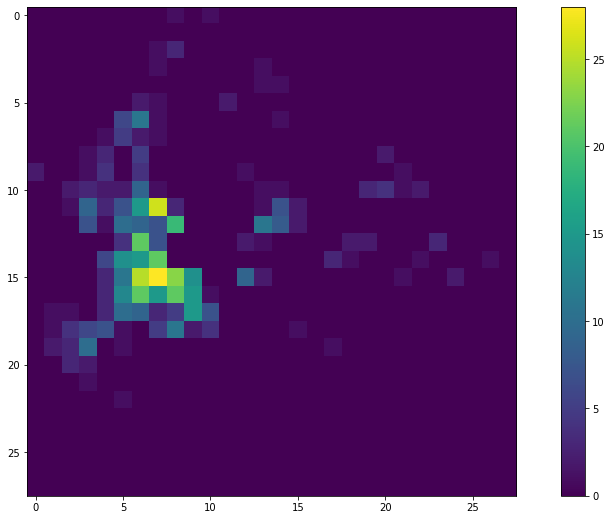

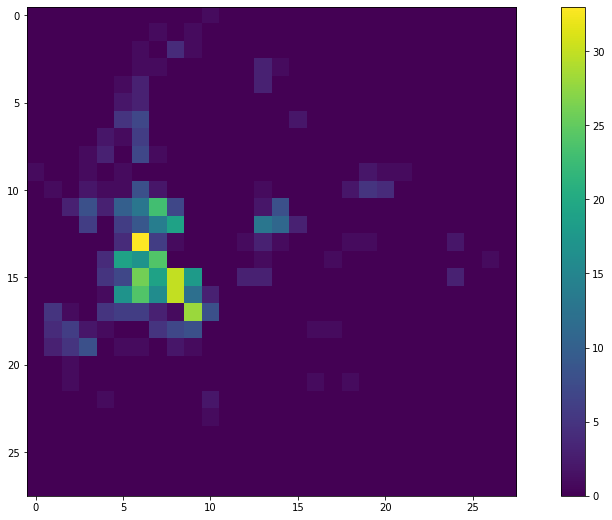

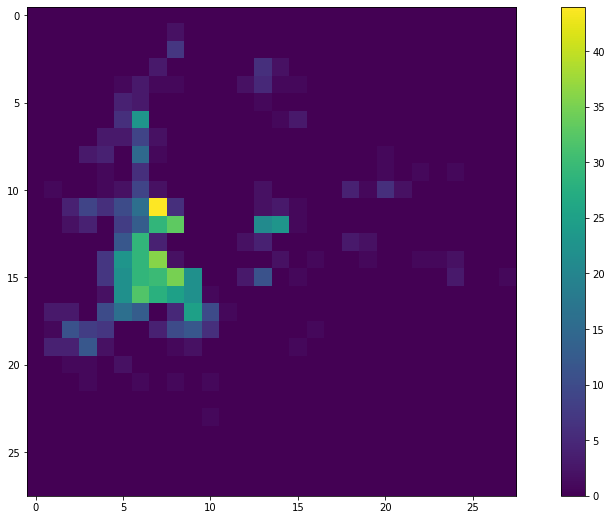

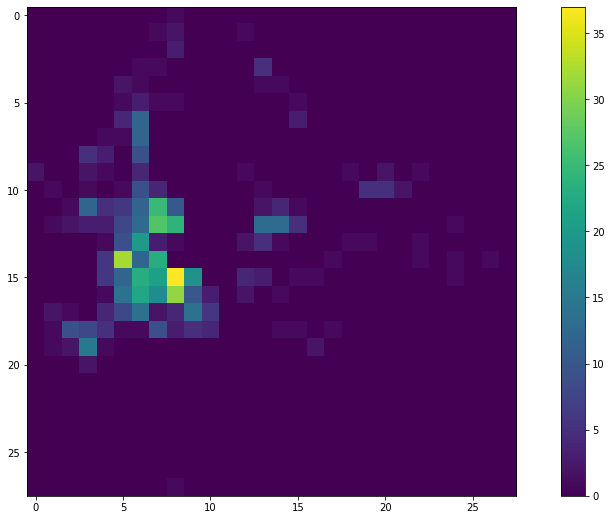

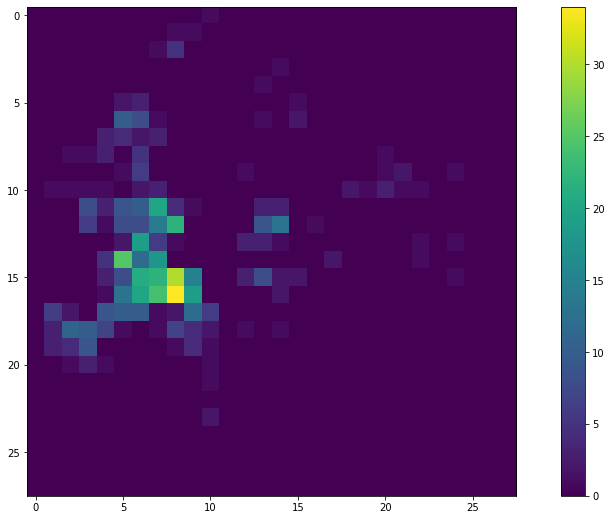

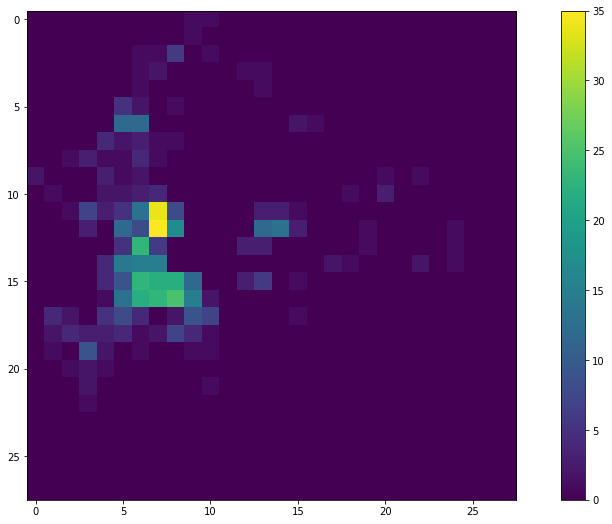

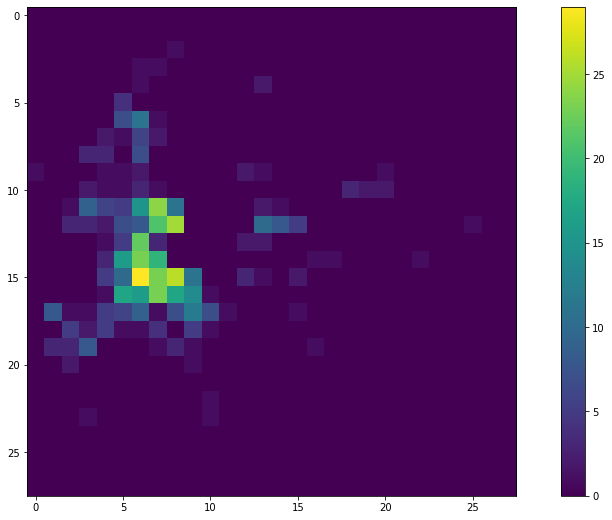

                 date   longitude   latitude
0 2016-01-01 01:10:00  121.426283  25.047863
1 2016-01-01 01:18:00  121.458573  25.145268
2 2016-01-01 01:27:00  121.509767  25.013844
3 2016-01-01 03:30:00  121.460724  25.093751
4 2016-01-01 03:47:00  121.419350  24.994834
                 date   longitude   latitude
0 2016-02-01 07:51:00  121.443086  24.970717
1 2016-02-01 07:56:00  121.514871  25.017963
2 2016-02-01 09:54:00  121.492815  25.084357
3 2016-02-01 10:13:00  121.482134  25.063504
4 2016-02-01 11:41:00  121.424515  25.002040
                 date   longitude   latitude
0 2016-03-01 00:47:00  121.476099  25.023972
1 2016-03-01 04:46:00  121.476329  25.094810
2 2016-03-01 05:24:00  121.484360  25.085941
3 2016-03-01 09:07:00  121.433651  25.011289
4 2016-03-01 09:26:00  121.333763  24.962419
                 date   longitude   latitude
0 2016-04-01 02:48:00  121.522760  25.000222
1 2016-04-01 02:55:00  121.522292  25.001705
2 2016-04-01 10:13:00  121.414849  25.087391
3 2016-04-

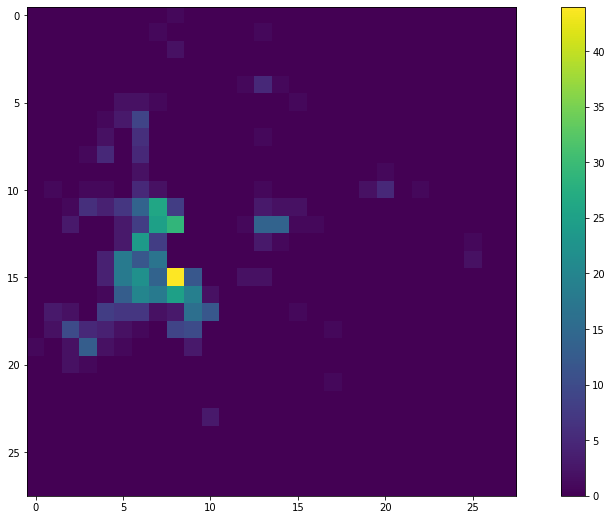

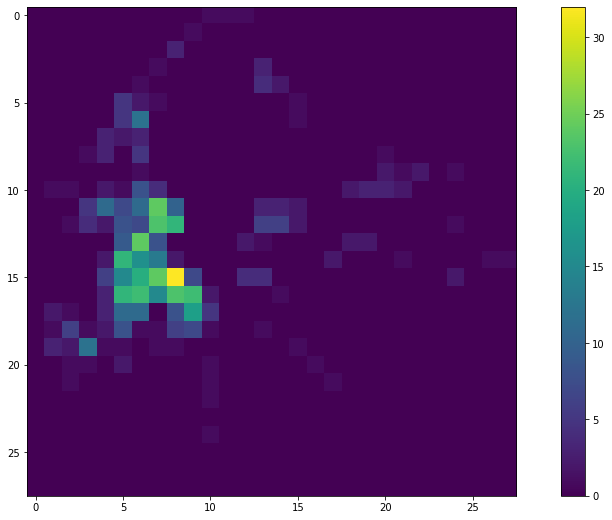

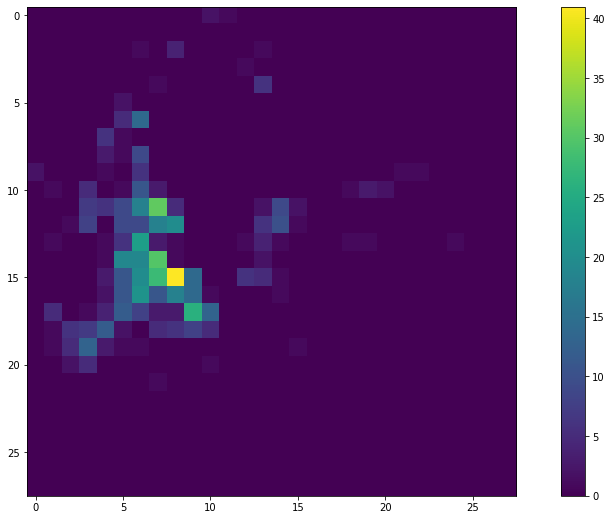

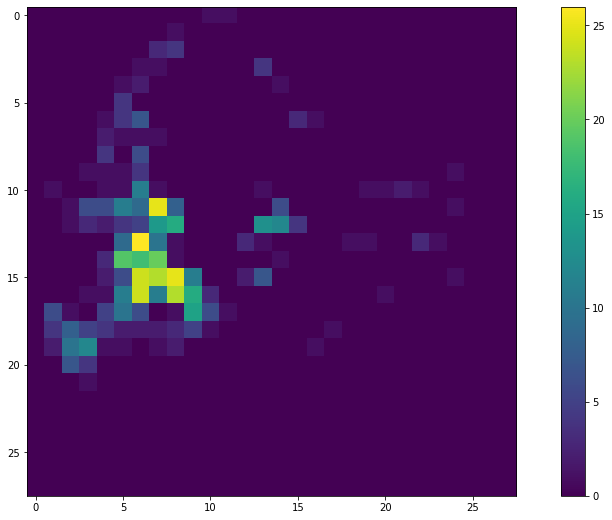

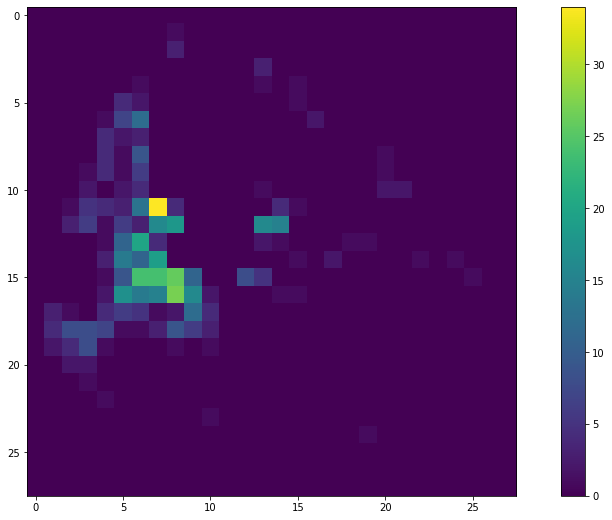

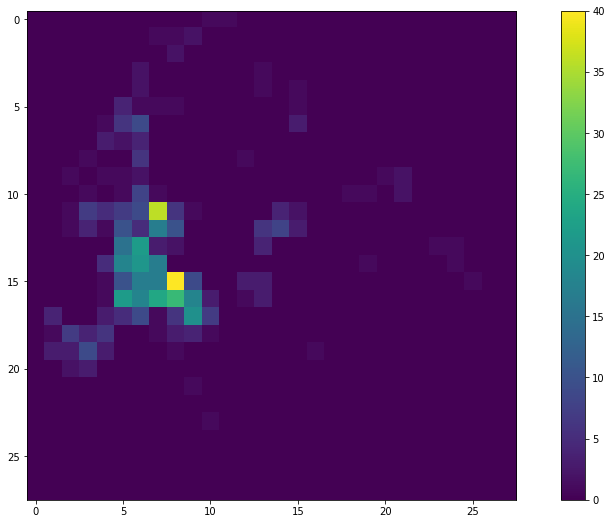

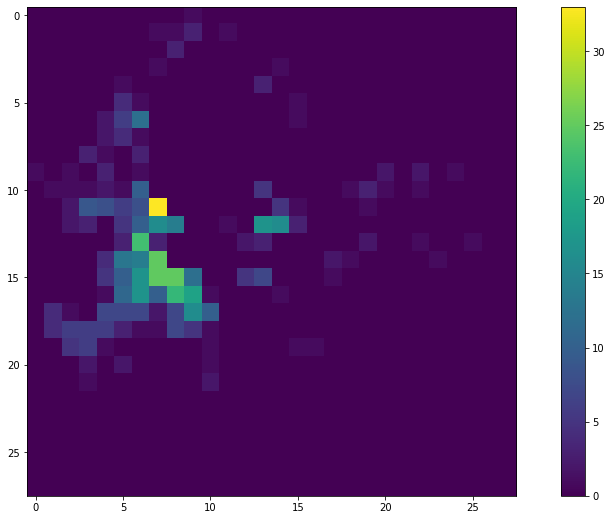

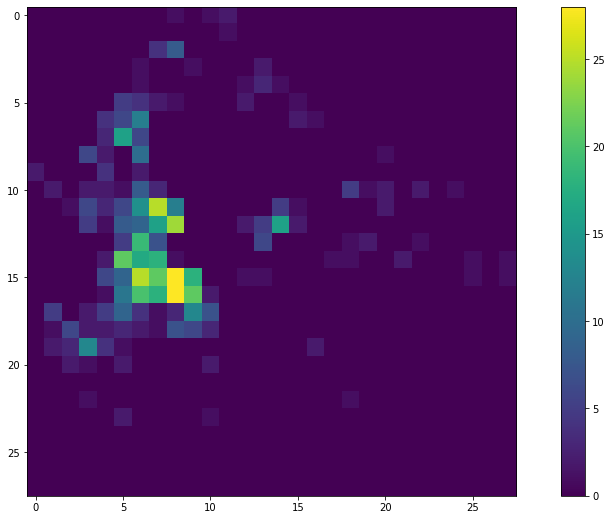

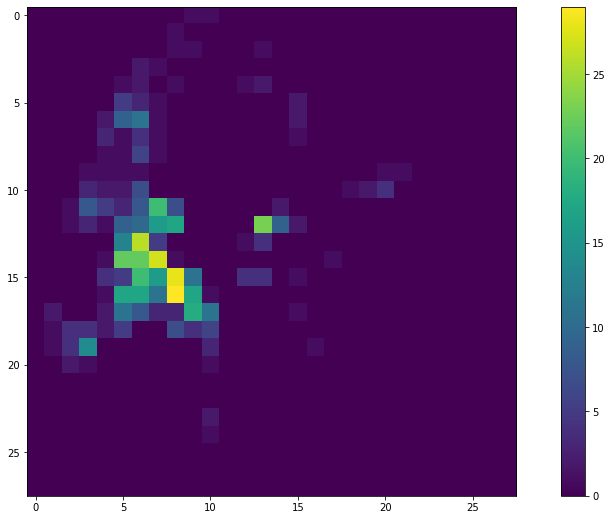

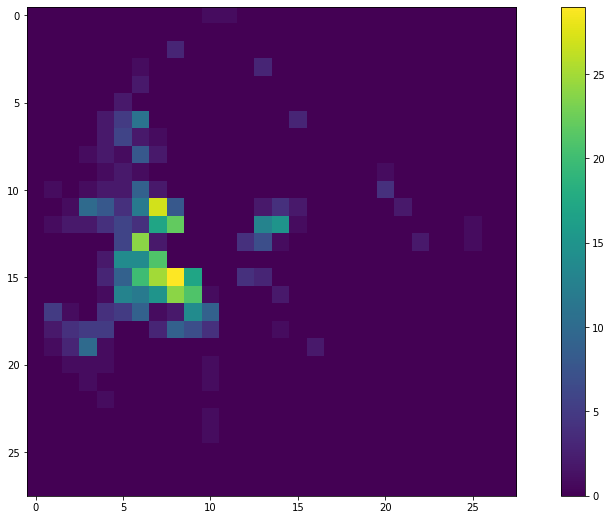

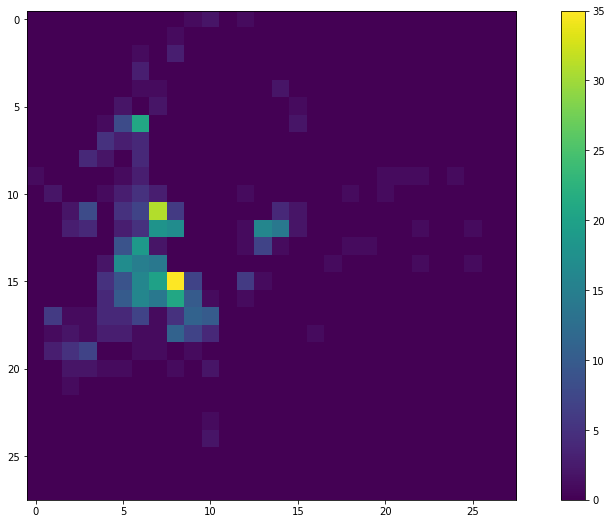

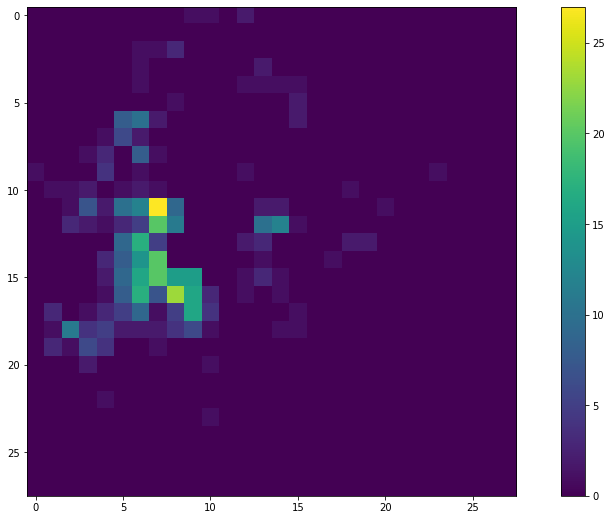

                 date   longitude   latitude
0 2017-01-01 00:13:00  121.346366  24.936866
1 2017-01-01 00:15:00  121.377841  24.929874
2 2017-01-01 00:54:00  121.456567  25.007928
3 2017-01-01 01:44:00  121.653837  25.062100
4 2017-01-01 01:59:00  121.665361  25.076035
                 date   longitude   latitude
0 2017-02-01 00:01:00  121.480253  25.081730
1 2017-02-01 00:51:00  121.541860  24.969297
2 2017-02-01 01:43:00  121.342960  24.956506
3 2017-02-01 04:40:00  121.434563  25.007098
4 2017-02-01 07:18:00  121.494575  25.070182
                 date   longitude   latitude
0 2017-03-01 00:19:00  121.440515  25.190427
1 2017-03-01 01:30:00  121.441348  24.973449
2 2017-03-01 03:20:00  121.504333  25.067229
3 2017-03-01 08:42:00  121.475427  25.087659
4 2017-03-01 10:40:00  121.448876  25.035000
                 date   longitude   latitude
0 2017-04-01 00:24:00  121.448834  25.046750
1 2017-04-01 07:28:00  121.634601  25.010798
2 2017-04-01 15:32:00  121.481934  24.948995
3 2017-04-

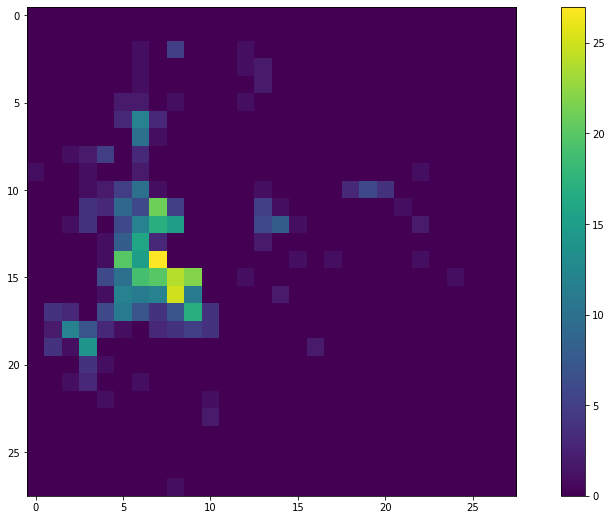

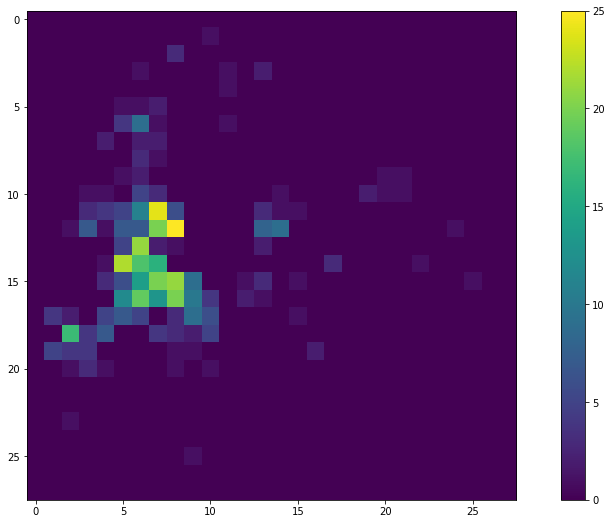

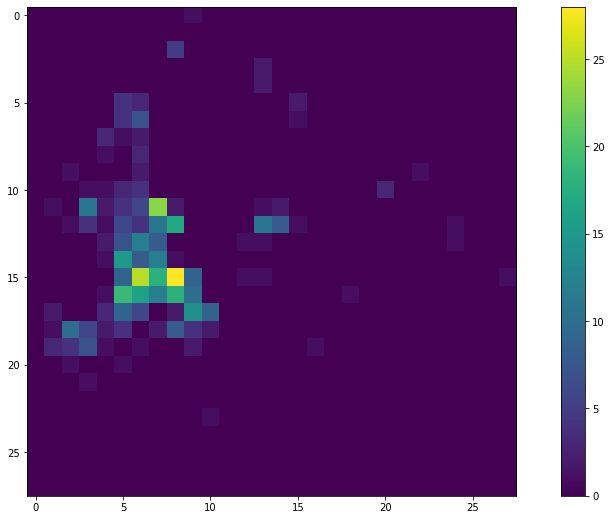

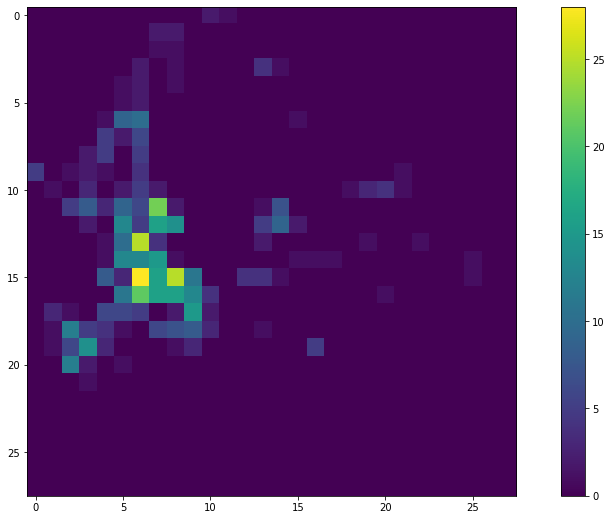

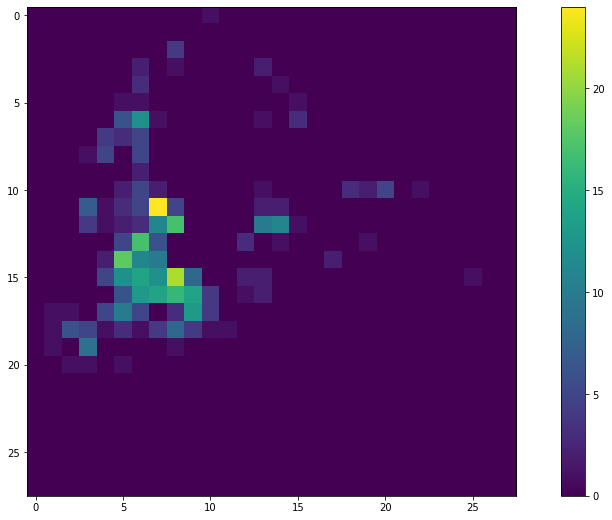

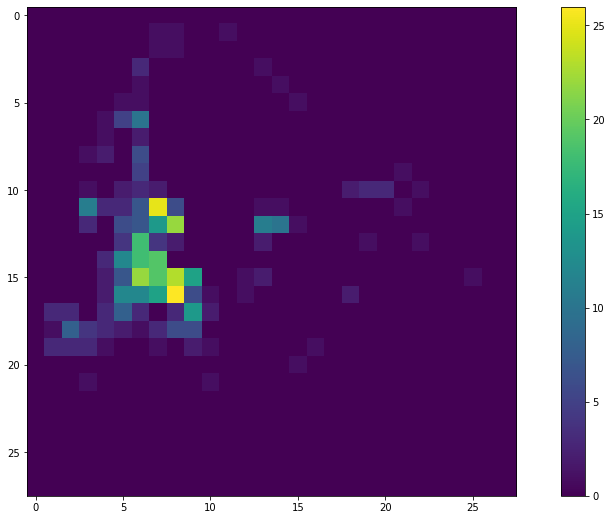

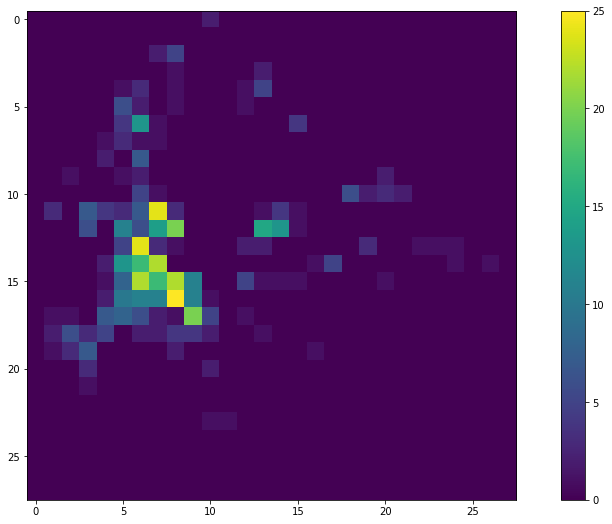

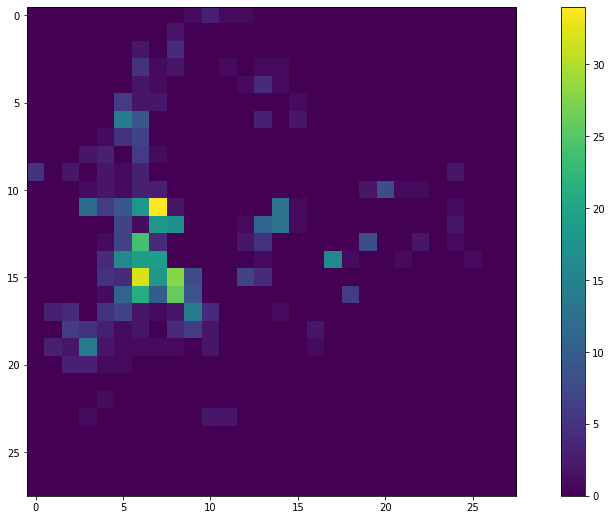

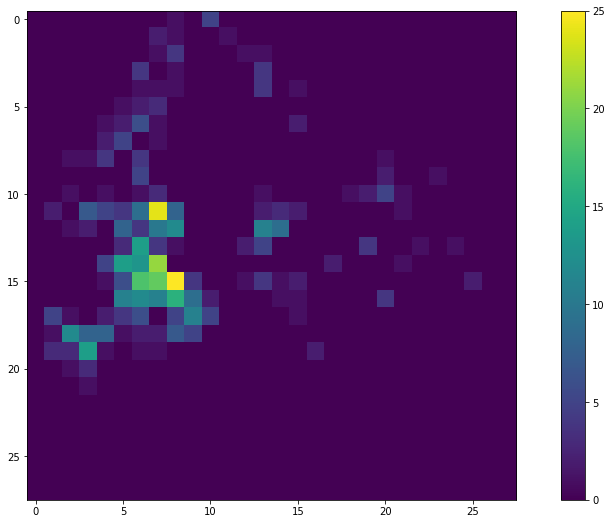

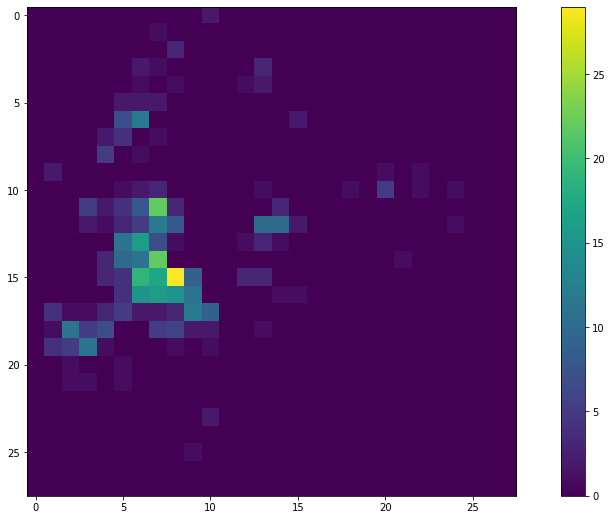

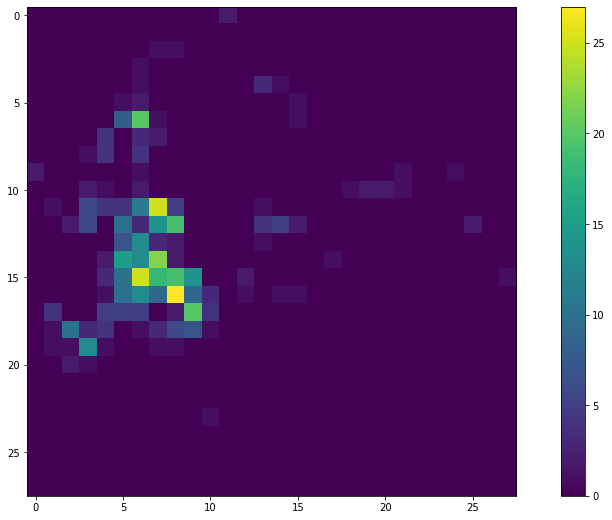

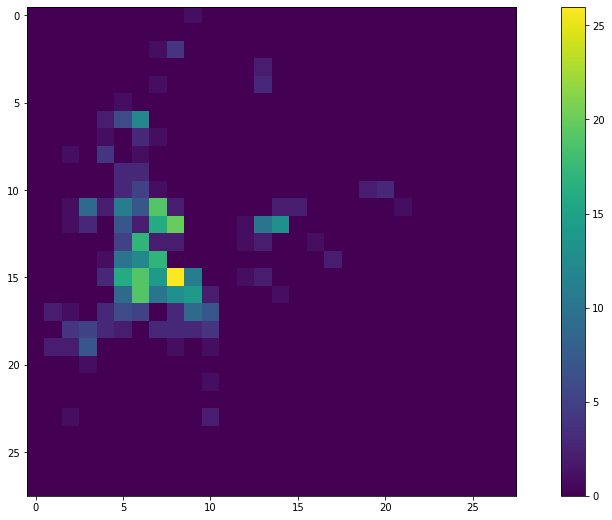

In [31]:
def dozenisation(dff, BBox=BBox):

  timeframe01 = (dff['date'].dt.month == 1)
  df01 = dff.loc[timeframe01]
  df01 = df01.reset_index(drop=True)
  timeframe02 = (dff['date'].dt.month == 2)
  df02 = dff.loc[timeframe02]
  df02 = df02.reset_index(drop=True)
  timeframe03 = (dff['date'].dt.month == 3)
  df03 = dff.loc[timeframe03]
  df03 = df03.reset_index(drop=True)
  timeframe04 = (dff['date'].dt.month == 4)
  df04 = dff.loc[timeframe04]
  df04 = df04.reset_index(drop=True)
  timeframe05 = (dff['date'].dt.month == 5)
  df05 = dff.loc[timeframe05]
  df05 = df05.reset_index(drop=True)
  timeframe06 = (dff['date'].dt.month == 6)
  df06 = dff.loc[timeframe06]
  df06 = df06.reset_index(drop=True)

  timeframe07 = (dff['date'].dt.month == 7)
  df07 = dff.loc[timeframe07]
  df07 = df07.reset_index(drop=True)
  timeframe08 = (dff['date'].dt.month == 8)
  df08 = dff.loc[timeframe08]
  df08 = df08.reset_index(drop=True)
  timeframe09 = (dff['date'].dt.month == 9)
  df09 = dff.loc[timeframe09]
  df09 = df09.reset_index(drop=True)
  timeframe10 = (dff['date'].dt.month == 10)
  df10 = dff.loc[timeframe10]
  df10 = df10.reset_index(drop=True)
  timeframe11 = (dff['date'].dt.month == 11)
  df11 = dff.loc[timeframe11]
  df11 = df11.reset_index(drop=True)
  timeframe12 = (dff['date'].dt.month == 12)
  df12 = dff.loc[timeframe12]
  df12 = df12.reset_index(drop=True)

  print(df01.head())
  print(df02.head())
  print(df03.head())
  print(df04.head())
  print(df05.head())
  print(df06.head())

  print(df07.head())
  print(df08.head())
  print(df09.head())
  print(df10.head())
  print(df11.head())
  print(df12.head())

  fig1 = cytogenesis(df01, 28, BBox)
  fig2 = cytogenesis(df02, 28, BBox)
  fig3 = cytogenesis(df03, 28, BBox)
  fig4 = cytogenesis(df04, 28, BBox)
  fig5 = cytogenesis(df05, 28, BBox)
  fig6 = cytogenesis(df06, 28, BBox)

  fig7 = cytogenesis(df07, 28, BBox)
  fig8 = cytogenesis(df08, 28, BBox)
  fig9 = cytogenesis(df09, 28, BBox)
  fig10 = cytogenesis(df10, 28, BBox)
  fig11 = cytogenesis(df11, 28, BBox)
  fig12 = cytogenesis(df12, 28, BBox)

  return fig1, fig2, fig3, fig4, fig5, fig6, fig7, fig8, fig9, fig10, fig11, fig12

fig1501, fig1502, fig1503, fig1504, fig1505, fig1506, fig1507, fig1508, fig1509, fig1510, fig1511, fig1512 = dozenisation(dfn15)
fig1601, fig1602, fig1603, fig1604, fig1605, fig1606, fig1607, fig1608, fig1609, fig1610, fig1611, fig1612 = dozenisation(dfn16)
fig1701, fig1702, fig1703, fig1704, fig1705, fig1706, fig1707, fig1708, fig1709, fig1710, fig1711, fig1712 = dozenisation(dfn17)

In [32]:
fig1501.shape

(28, 28)

In [33]:
hmarray =  np.array([fig1501, fig1502, fig1503, fig1504, fig1505, fig1506, fig1507, fig1508, fig1509, fig1510, fig1511, fig1512,
                      fig1601, fig1602, fig1603, fig1604, fig1605, fig1606, fig1607, fig1608, fig1609, fig1610, fig1611, fig1612,
                      fig1701, fig1702, fig1703, fig1704, fig1705, fig1706, fig1707, fig1708, fig1709, fig1710, fig1711, fig1712
                      ], dtype='uint8')

maxcolour = hmarray.max()

In [34]:
hmarray.shape

(36, 28, 28)

In [35]:
'''
i = 0
for i in range(0, len(hmnew)-1,1):
  plt.imshow(hmnew[i], cmap='gray', vmin=0, vmax=255)
  plt.show()'''

"\ni = 0\nfor i in range(0, len(hmnew)-1,1):\n  plt.imshow(hmnew[i], cmap='gray', vmin=0, vmax=255)\n  plt.show()"

In [36]:
"""
If you don't want to save files, you don't have to import PIL
from PIL import Image 
import PIL
"""

trainarray = np.empty((24,28,28))
testarray = np.empty((12,28,28))

seqA = np.arange(0,12,1)
seqB = np.arange(0,24,1)

i = 0
j = 0
k = 0

for i in range (0,len(hmarray),1):
  if (i % 3 == 2):
    testarray[seqA[j]] = hmarray[i]
    j+=1
  else:
    trainarray[seqB[k]] = hmarray[i]
    k+=1

In [37]:
trainarray.shape #check dataset dimensions

(24, 28, 28)

In [38]:
testarray.shape #check dataset dimensions

(12, 28, 28)

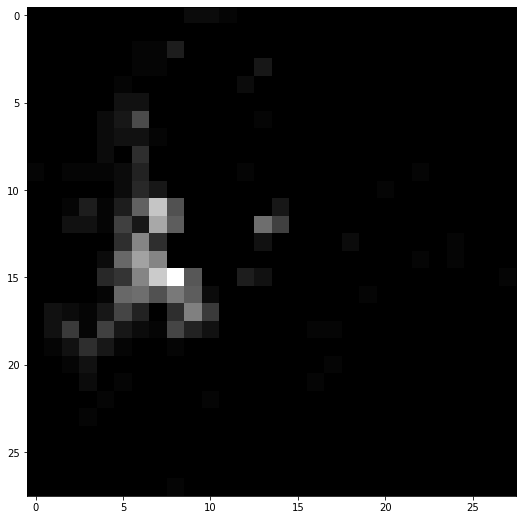

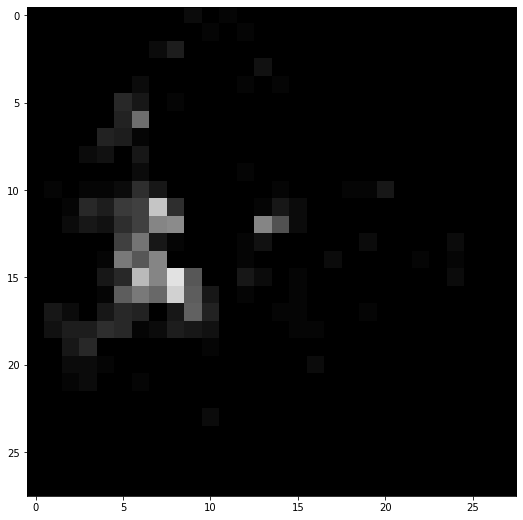

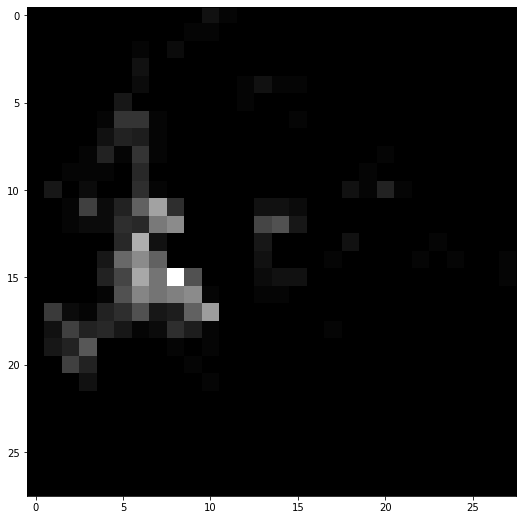

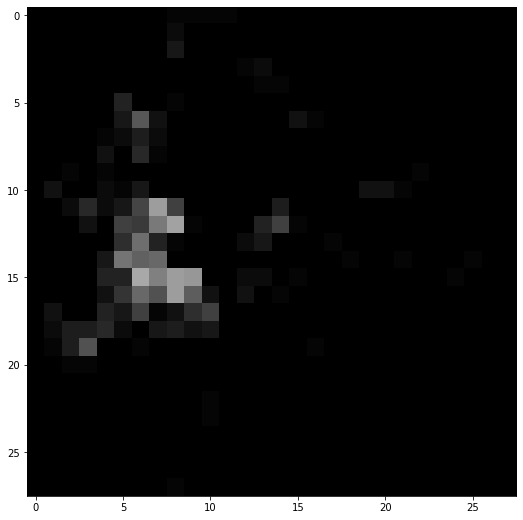

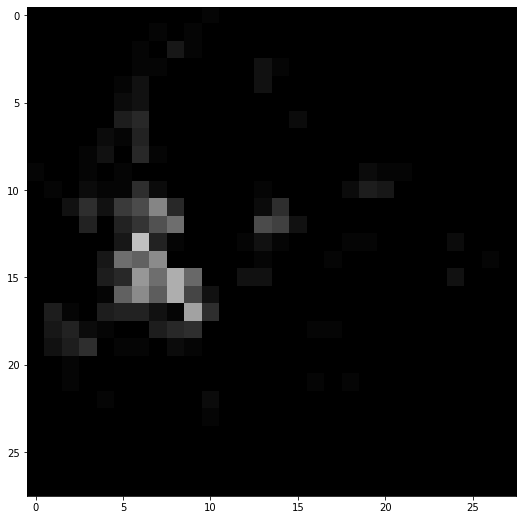

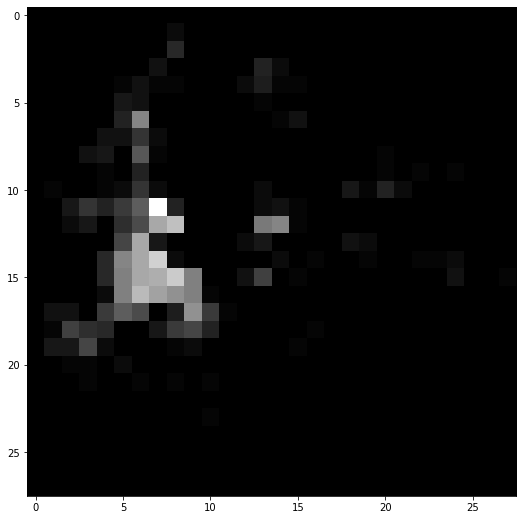

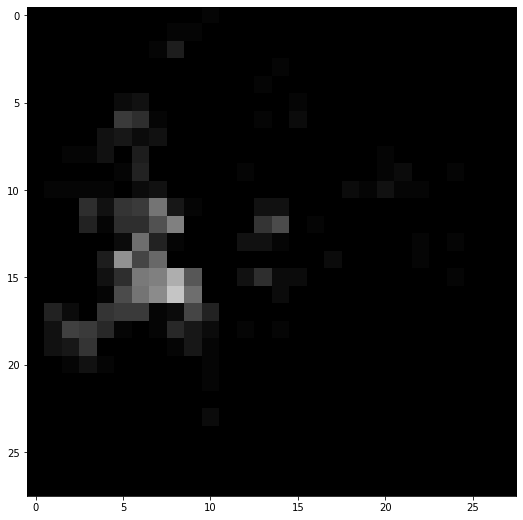

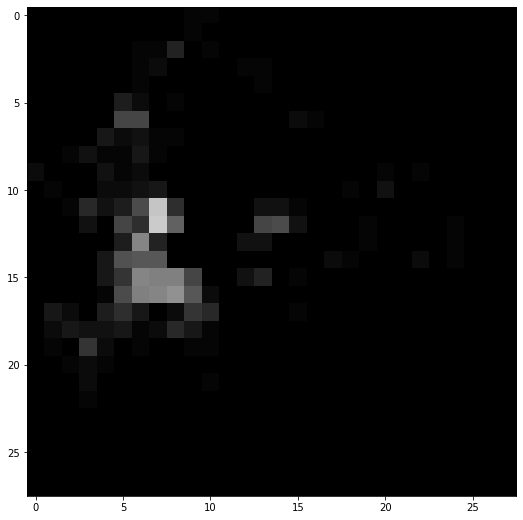

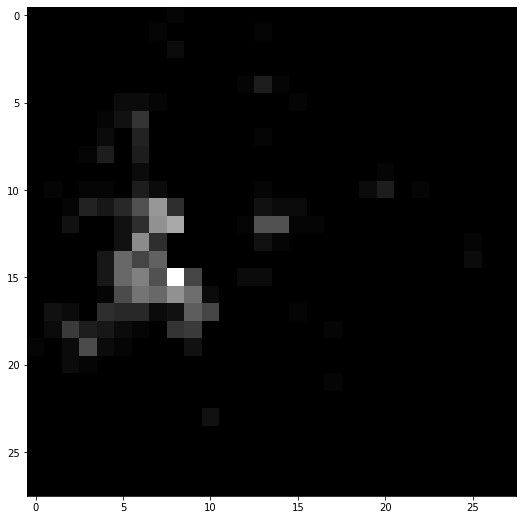

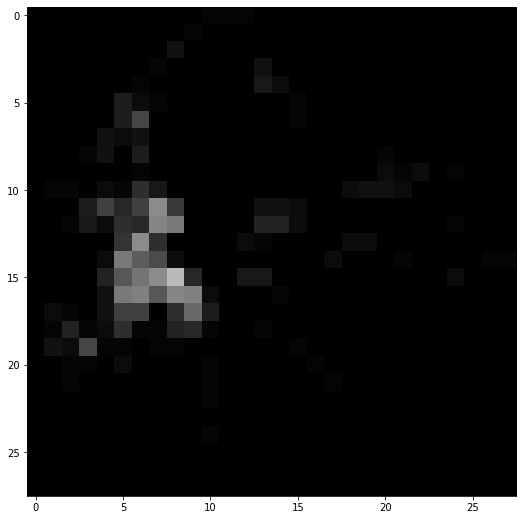

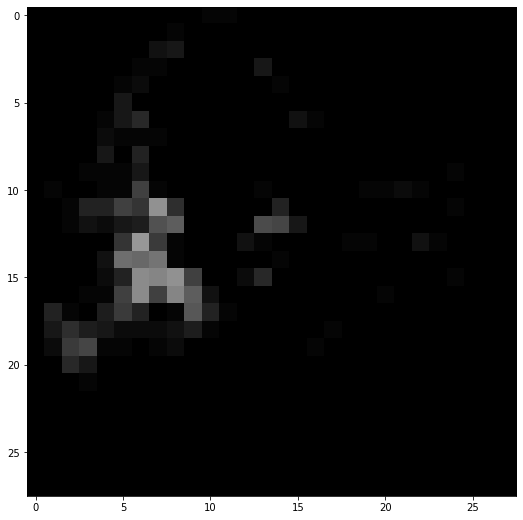

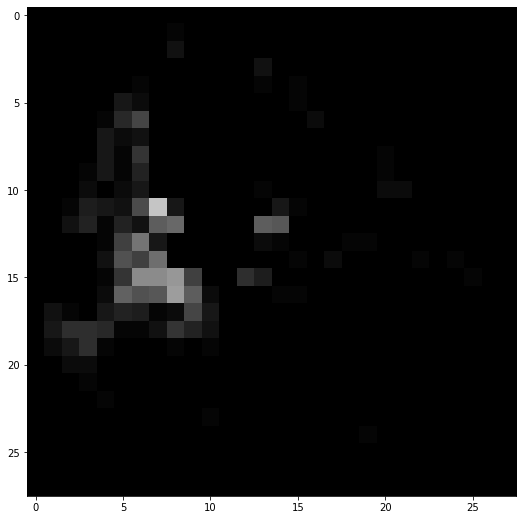

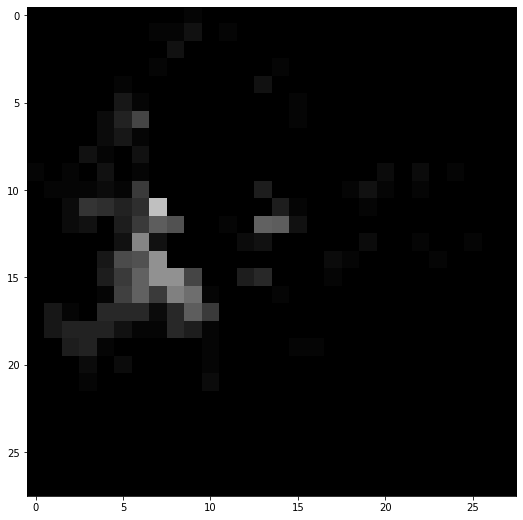

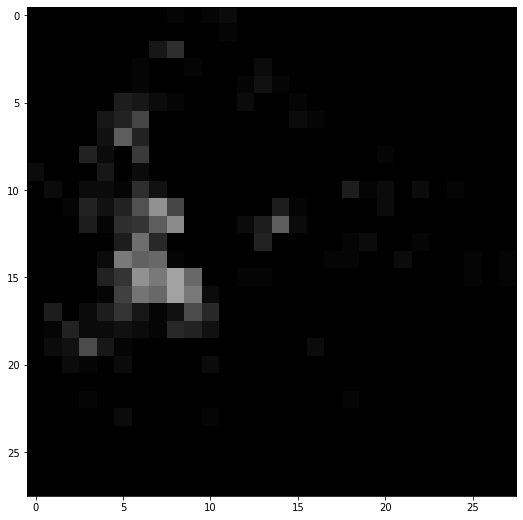

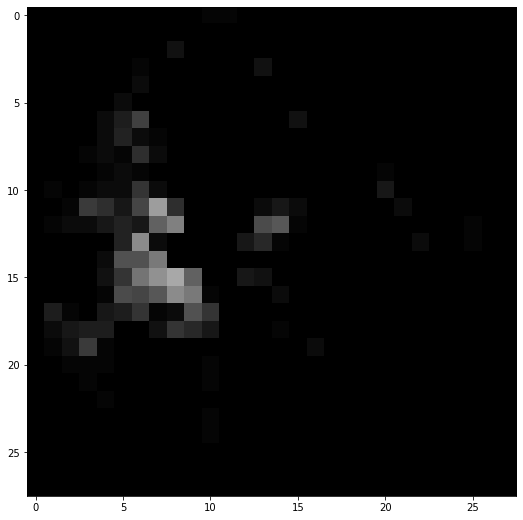

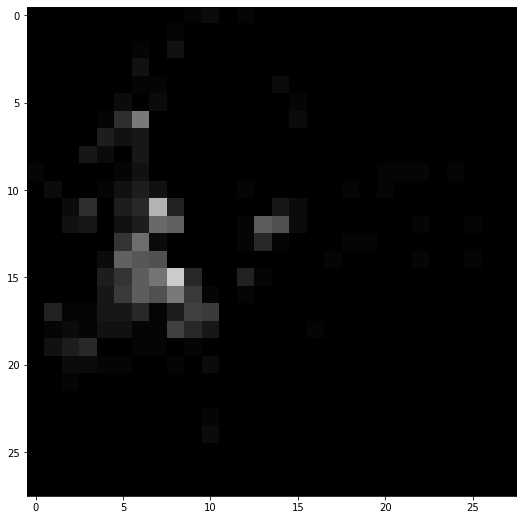

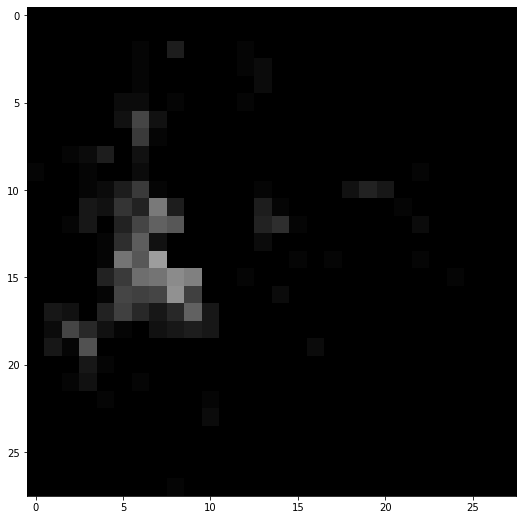

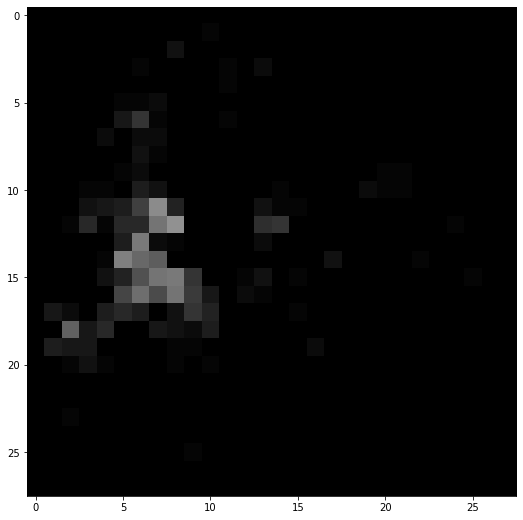

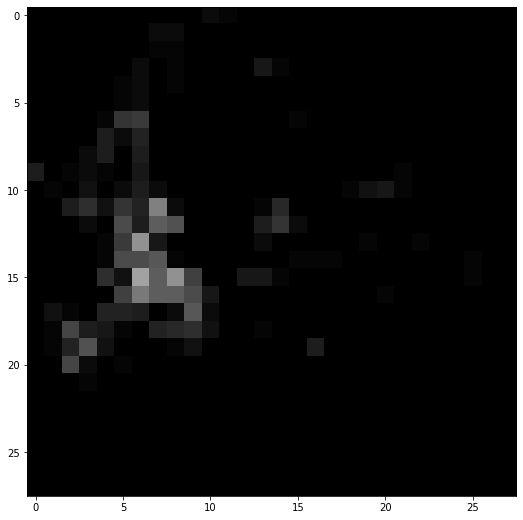

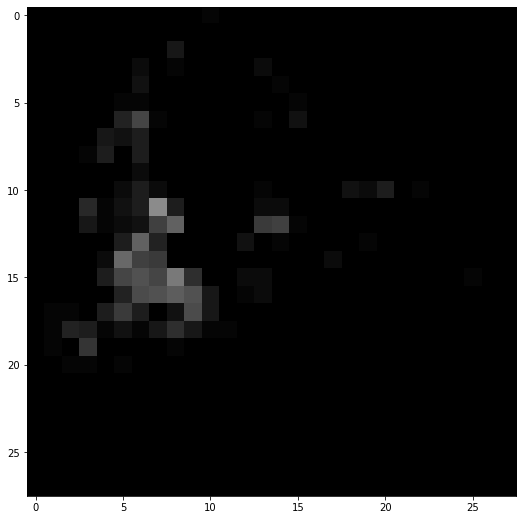

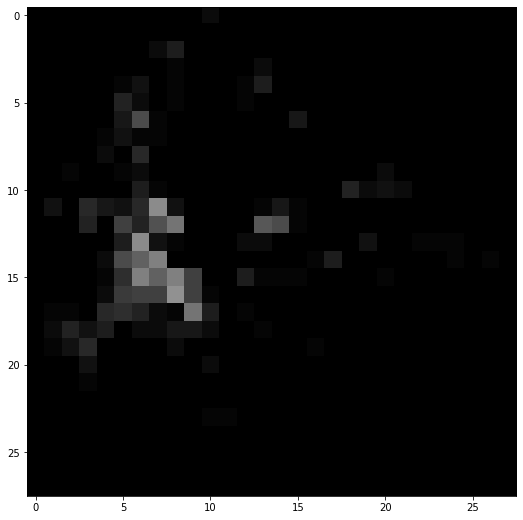

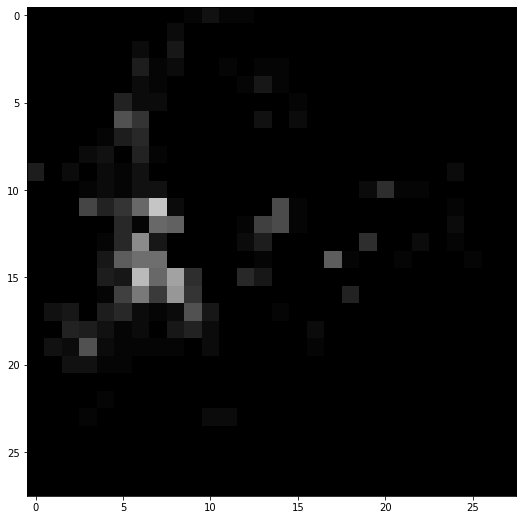

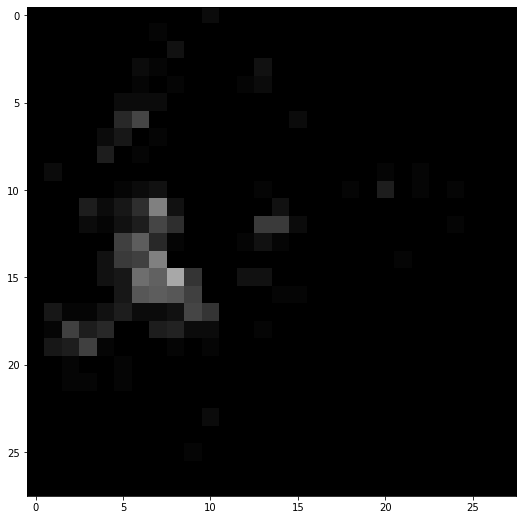

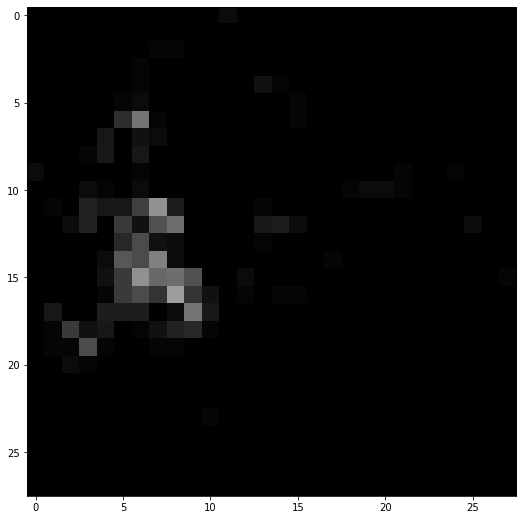

In [39]:
for i in range(0, len(trainarray),1):
  plt.imshow(trainarray[i], cmap='gray', vmin=0, vmax=maxcolour)
  plt.show()

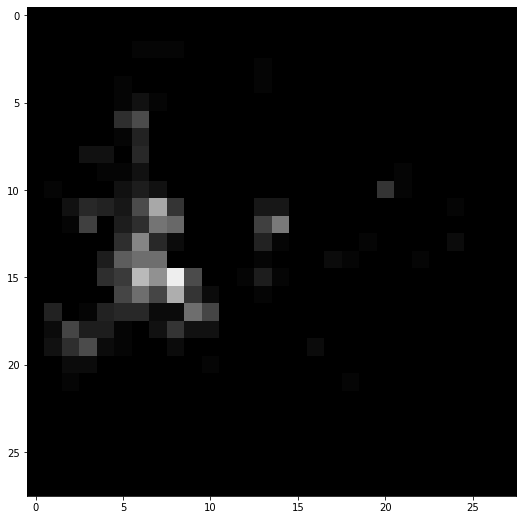

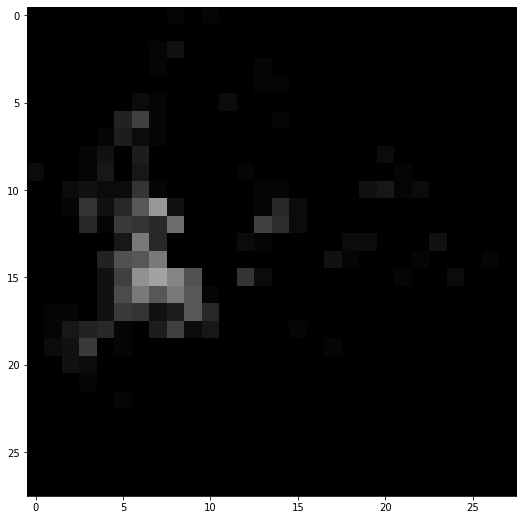

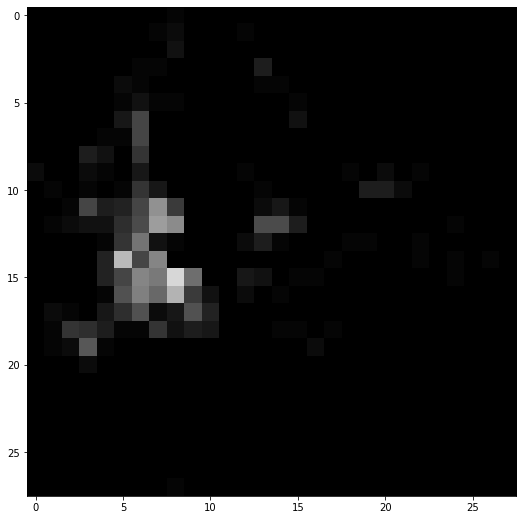

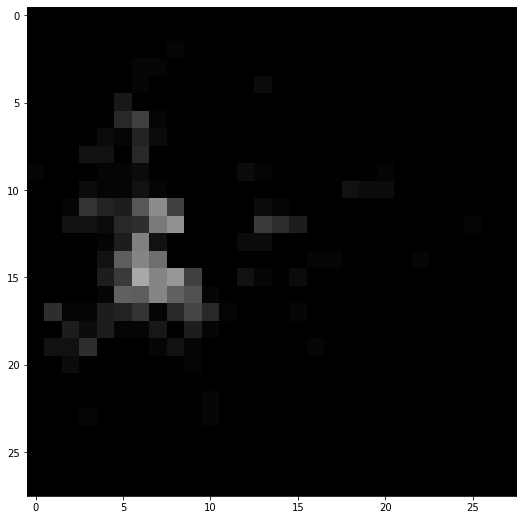

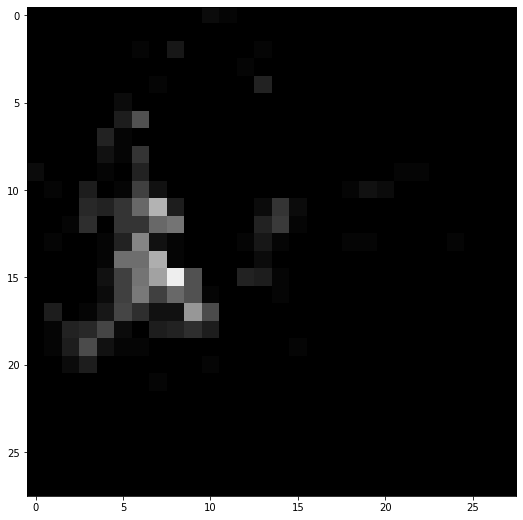

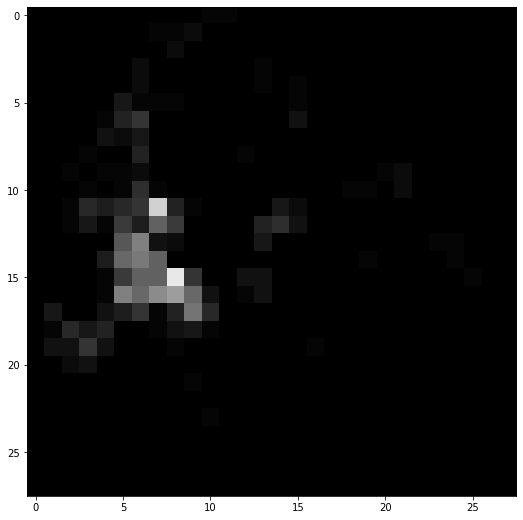

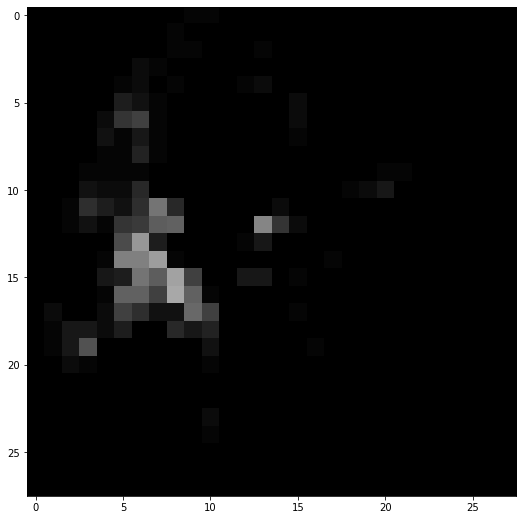

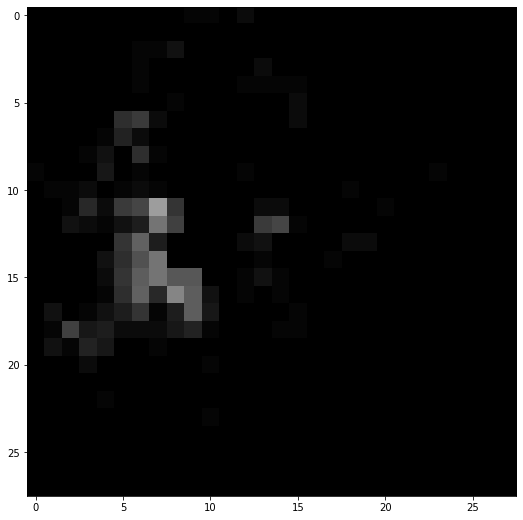

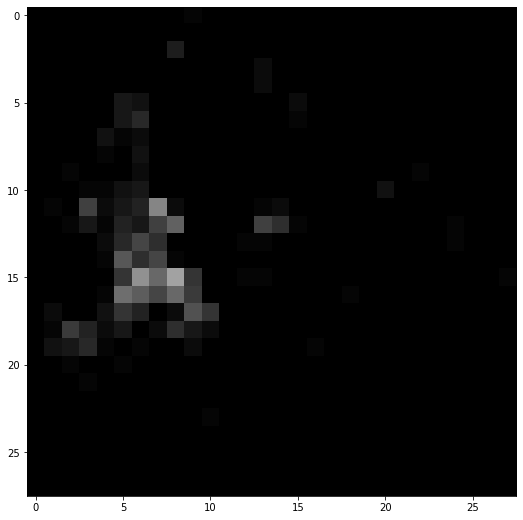

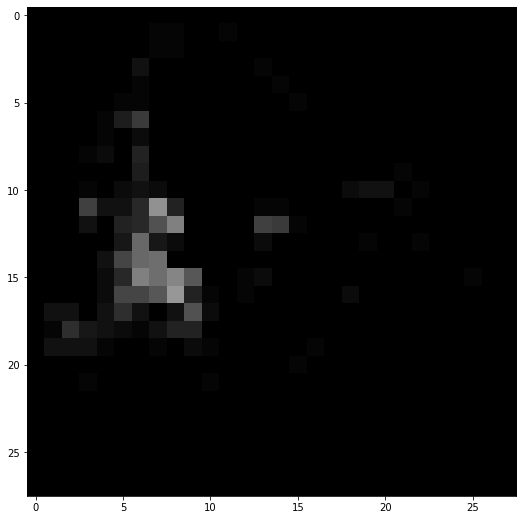

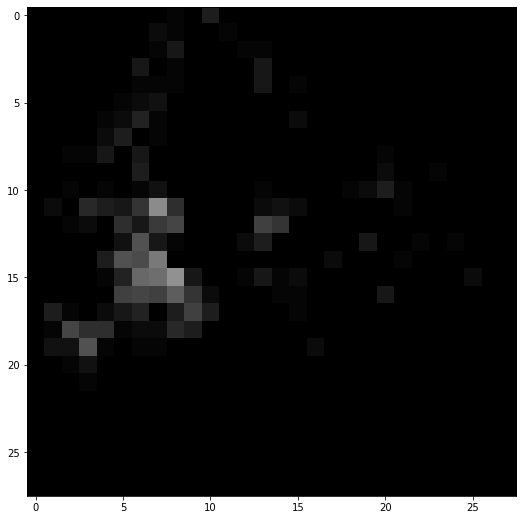

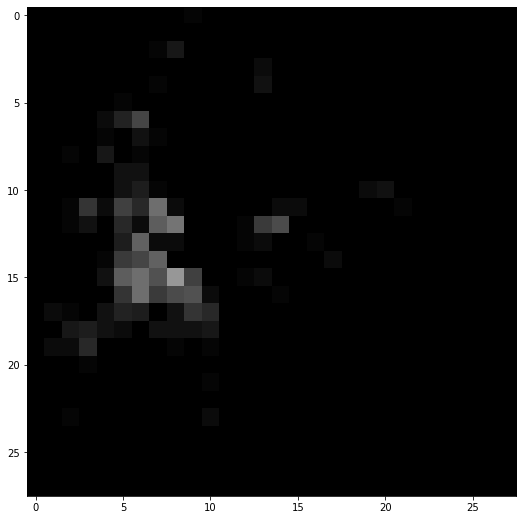

In [40]:
for i in range(0, len(testarray),1):
  plt.imshow(testarray[i], cmap='gray', vmin=0, vmax=maxcolour)
  plt.show()

#Data Figure Save
If you do not want to save data, skip this subsection (4 cells below)

In [41]:
'''%mkdir datafig
%cd datafig
%mkdir train
%mkdir test'''

'%mkdir datafig\n%cd datafig\n%mkdir train\n%mkdir test'

In [42]:
'''%cd /content/datafig/train
j = 0
for i in range(0, len(trainarray), 1):
  j+=1
  im = Image.fromarray(trainarray[i])
  im.save("train"+str(j)+".png")'''

'%cd /content/datafig/train\nj = 0\nfor i in range(0, len(trainarray), 1):\n  j+=1\n  im = Image.fromarray(trainarray[i])\n  im.save("train"+str(j)+".png")'

In [43]:
'''%cd /content/datafig/test
j = 0
for i in range(0, len(testarray), 1):
  j+=1
  im = Image.fromarray(trainarray[i])
  im.save("test"+str(j)+".png")'''

'%cd /content/datafig/test\nj = 0\nfor i in range(0, len(testarray), 1):\n  j+=1\n  im = Image.fromarray(trainarray[i])\n  im.save("test"+str(j)+".png")'

In [44]:
#at this step, you need to download the figures in the files console to the left, in order to be used by spatial models.
'''
from google.colab import files
!zip -r /content/datafig.zip /content/datafig
files.download("/content/datafig.zip")
'''

'\nfrom google.colab import files\n!zip -r /content/datafig.zip /content/datafig\nfiles.download("/content/datafig.zip")\n'

#Data preparation for the spatial neural network (Conv-Variational-Autoencoder) CVAE
Using tensorflow-keras, we need to prepare the data to check its dimensionality before feeding it to a neural network (convolutional autoencoder).

In [45]:
!pip install tensorflow-probability

# to generate gifs
!pip install imageio
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-kz2h51rq
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-kz2h51rq
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=162411 sha256=eafa8d9d2eae22a355831b98fcbf821f5c0e2f6f891c6731570b5646ef3ebf35
  Stored in directory: /tmp/pip-ephem-wheel-cache-b7atm_oq/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Successfully built tensorflow-docs


In [46]:
#reimport required modules

from IPython import display

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import tensorflow_probability as tfp
import time

In [47]:
train_images = trainarray
test_images = testarray

In [48]:
def preprocess_images(images):
  images = images.reshape((images.shape[0], 28, 28, 1)) / maxcolour
  return np.where(images > .5, 1.0, 0.0).astype('float32')

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

In [49]:
train_images.shape

(24, 28, 28, 1)

In [50]:
test_images.shape

(12, 28, 28, 1)

In [51]:
train_size = 24
batch_size = 12
test_size = 12

In [52]:
train_dataset = (tf.data.Dataset.from_tensor_slices(train_images)
                 .shuffle(train_size).batch(batch_size))
test_dataset = (tf.data.Dataset.from_tensor_slices(test_images)
                .shuffle(test_size).batch(batch_size))

## Define the encoder and decoder networks with *tf.keras.Sequential*

In this VAE example, use two small ConvNets for the encoder and decoder networks. In the literature, these networks are also referred to as inference/recognition and generative models respectively. Use `tf.keras.Sequential` to simplify implementation. Let $x$ and $z$ denote the observation and latent variable respectively in the following descriptions.

### Encoder network
This defines the approximate posterior distribution $q(z|x)$, which takes as input an observation and outputs a set of parameters for specifying the conditional distribution of the latent representation $z$. 
In this example, simply model the distribution as a diagonal Gaussian, and the network outputs the mean and log-variance parameters of a factorized Gaussian. 
Output log-variance instead of the variance directly for numerical stability.

### Decoder network 
This defines the conditional distribution of the observation $p(x|z)$, which takes a latent sample $z$ as input and outputs the parameters for a conditional distribution of the observation.
Model the latent distribution prior $p(z)$ as a unit Gaussian.

### Reparameterization trick
To generate a sample $z$ for the decoder during training, you can sample from the latent distribution defined by the parameters outputted by the encoder, given an input observation $x$.
However, this sampling operation creates a bottleneck because backpropagation cannot flow through a random node.

To address this, use a reparameterization trick.
In our example, you approximate $z$ using the decoder parameters and another parameter $\epsilon$ as follows:

$$z = \mu + \sigma \odot \epsilon$$

where $\mu$ and $\sigma$ represent the mean and standard deviation of a Gaussian distribution respectively. They can be derived from the decoder output. The $\epsilon$ can be thought of as a random noise used to maintain stochasticity of $z$. Generate $\epsilon$ from a standard normal distribution.

The latent variable $z$ is now generated by a function of $\mu$, $\sigma$ and $\epsilon$, which would enable the model to backpropagate gradients in the encoder through $\mu$ and $\sigma$ respectively, while maintaining stochasticity through $\epsilon$.

### Network architecture
For the encoder network, use two convolutional layers followed by a fully-connected layer. In the decoder network, mirror this architecture by using a fully-connected layer followed by three convolution transpose layers (a.k.a. deconvolutional layers in some contexts). Note, it's common practice to avoid using batch normalization when training VAEs, since the additional stochasticity due to using mini-batches may aggravate instability on top of the stochasticity from sampling.


In [53]:
class CVAE(tf.keras.Model):
  """Convolutional variational autoencoder."""

  def __init__(self, latent_dim):
    super(CVAE, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
            tf.keras.layers.Conv2D(
                filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(
                filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            # No activation
            tf.keras.layers.Dense(latent_dim + latent_dim),
        ]
    )

    self.decoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(latent_dim,)),
            tf.keras.layers.Dense(units=7*7*32, activation=tf.nn.relu),
            tf.keras.layers.Reshape(target_shape=(7, 7, 32)),
            tf.keras.layers.Conv2DTranspose(
                filters=64, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            tf.keras.layers.Conv2DTranspose(
                filters=32, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            # No activation
            tf.keras.layers.Conv2DTranspose(
                filters=1, kernel_size=3, strides=1, padding='same'),
        ]
    )

  @tf.function
  def sample(self, eps=None):
    if eps is None:
      eps = tf.random.normal(shape=(100, self.latent_dim))
    return self.decode(eps, apply_sigmoid=True)

  def encode(self, x):
    mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
    return mean, logvar

  def reparameterize(self, mean, logvar):
    eps = tf.random.normal(shape=mean.shape)
    return eps * tf.exp(logvar * .5) + mean

  def decode(self, z, apply_sigmoid=False):
    logits = self.decoder(z)
    if apply_sigmoid:
      probs = tf.sigmoid(logits)
      return probs
    return logits

## Define the loss function and the optimizer

VAEs train by maximizing the evidence lower bound (ELBO) on the marginal log-likelihood:

$$\log p(x) \ge \text{ELBO} = \mathbb{E}_{q(z|x)}\left[\log \frac{p(x, z)}{q(z|x)}\right].$$

In practice, optimize the single sample Monte Carlo estimate of this expectation:

$$\log p(x| z) + \log p(z) - \log q(z|x),$$
where $z$ is sampled from $q(z|x)$.

Note: You could also analytically compute the KL term, but here you incorporate all three terms in the Monte Carlo estimator for simplicity.

In [54]:
optimizer = tf.keras.optimizers.Adam(1e-3)


def log_normal_pdf(sample, mean, logvar, raxis=1):
  log2pi = tf.math.log(2. * np.pi)
  return tf.reduce_sum(
      -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
      axis=raxis)


def compute_loss(model, x):
  mean, logvar = model.encode(x)
  z = model.reparameterize(mean, logvar)
  x_logit = model.decode(z)
  cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)
  logpx_z = -tf.reduce_sum(cross_ent, axis=[1, 2, 3])
  logpz = log_normal_pdf(z, 0., 0.)
  logqz_x = log_normal_pdf(z, mean, logvar)
  return -tf.reduce_mean(logpx_z + logpz - logqz_x)


@tf.function
def train_step(model, x, optimizer):
  """Executes one training step and returns the loss.

  This function computes the loss and gradients, and uses the latter to
  update the model's parameters.
  """
  with tf.GradientTape() as tape:
    loss = compute_loss(model, x)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

## Training

* Start by iterating over the dataset
* During each iteration, pass the image to the encoder to obtain a set of mean and log-variance parameters of the approximate posterior $q(z|x)$
* then apply the *reparameterization trick* to sample from $q(z|x)$
* Finally, pass the reparameterized samples to the decoder to obtain the logits of the generative distribution $p(x|z)$
* Note: Since you use the dataset loaded by keras with 60k datapoints in the training set and 10k datapoints in the test set, our resulting ELBO on the test set is slightly higher than reported results in the literature which uses dynamic binarization of Larochelle's MNIST.

### Generating images

* After training, it is time to generate some images
* Start by sampling a set of latent vectors from the unit Gaussian prior distribution $p(z)$
* The generator will then convert the latent sample $z$ to logits of the observation, giving a distribution $p(x|z)$
* Here, plot the probabilities of Bernoulli distributions


In [65]:
epochs = 100
# set the dimensionality of the latent space to a plane for visualization later
latent_dim = 2
num_examples_to_generate = 12

# keeping the random vector constant for generation (prediction) so
# it will be easier to see the improvement.
random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, latent_dim])
model = CVAE(latent_dim)

In [66]:
def generate_and_save_images(model, epoch, test_sample):
  mean, logvar = model.encode(test_sample)
  z = model.reparameterize(mean, logvar)
  predictions = model.sample(z)
  fig = plt.figure(figsize=(3, 4))

  for i in range(predictions.shape[0]):
    plt.subplot(3, 4, i + 1)
    plt.imshow(predictions[i, :, :, 0], cmap='gray')
    plt.axis('off')

  # tight_layout minimizes the overlap between 2 sub-plots
  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()
  return predictions

In [67]:
# Pick a sample of the test set for generating output images
assert batch_size >= num_examples_to_generate
for test_batch in test_dataset.take(1):
  test_sample = test_batch[0:num_examples_to_generate, :, :, :]

Epoch: 100, Test set ELBO: -12.889330863952637, time elapse for current epoch: 0.015534639358520508


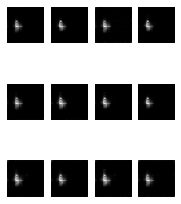

In [68]:
generate_and_save_images(model, 0, test_sample)

for epoch in range(1, epochs + 1):
  start_time = time.time()
  for train_x in train_dataset:
    train_step(model, train_x, optimizer)
  end_time = time.time()

  loss = tf.keras.metrics.Mean()
  for test_x in test_dataset:
    loss(compute_loss(model, test_x))
  elbo = -loss.result()
  display.clear_output(wait=False)
  print('Epoch: {}, Test set ELBO: {}, time elapse for current epoch: {}'
        .format(epoch, elbo, end_time - start_time))
  pred = generate_and_save_images(model, epoch, test_sample)
  #the final 'pred' tensor is exported off the loop after 100 epochs

In [69]:
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

(-0.5, 215.5, 287.5, -0.5)

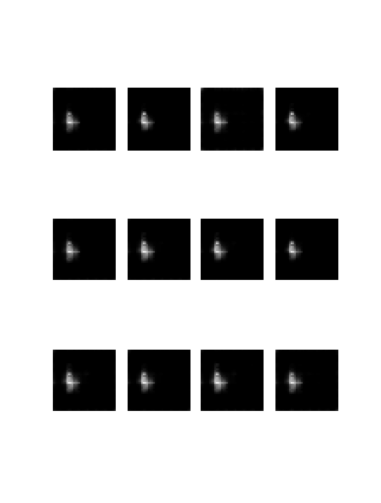

In [70]:
plt.imshow(display_image(epoch))
plt.axis('off')  # Display images

In [71]:
anim_file = 'cvae.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)


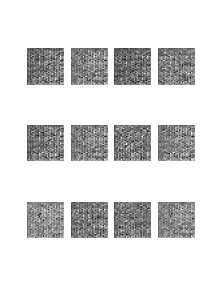

In [72]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)

In [73]:
gt = tf.squeeze(test_images)
gt = gt.numpy()
gt.shape

(12, 28, 28)

In [74]:
#select the first 12 images
gtnew = np.zeros([12,28,28], dtype='float32')
for i in range (0,12,1):
  gtnew[i,:,:] = gt[i,:,:]

In [75]:
gtnew.shape

(12, 28, 28)

In [76]:
pred = tf.squeeze(pred)
prednew = pred.numpy()
prednew.shape

(12, 28, 28)

In [78]:
mse = tf.keras.metrics.MeanSquaredError()
rmse = tf.keras.metrics.RootMeanSquaredError()
mae = tf.keras.metrics.MeanAbsoluteError()
mape = tf.keras.metrics.MeanAbsolutePercentageError()
mse1 = mse(gtnew, prednew)
rmse1 = rmse(gtnew, prednew)
mae1 = mae(gtnew, prednew)
mape1 = mape(gtnew, prednew)
print('MSE: ', mse1.numpy())
print('RMSE: ', rmse1.numpy())
print('MAE: ', mae1.numpy())
print('MAPE: ', mape1.numpy())

MSE:  0.004375972
RMSE:  0.066151135
MAE:  0.0089123715
MAPE:  4237253.5
